# Project : Avacado

Problem Statement:
Avocado is a fruit consumed by people heavily in the United States. 

Content
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

Date - The date of the observation

AveragePrice - the average price of a single avocado

type - conventional or organic

year - the year

Region - the city or region of the observation

Total Volume - Total number of avocados sold

4046 - Total number of avocados with PLU 4046 sold

4225 - Total number of avocados with PLU 4225 sold

4770 - Total number of avocados with PLU 4770 sold


Inspiration /Label 

The dataset can be seen in two angles to find the region and find the average price .

Task: One of Classification and other of Regression

I imported the requries libraries for my preprocessing part.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

The data is about avocado which is a fruit and regarding avocado there is some data which is explained in the below cell.

What is present in our data?

Date - The date of the observation

Average Price - The average price of a single avocado

Type - Whether it is conventional or organic

Year - The year information

Region - The city or region of the observation

Total Volume - Total number of avocados sold

4046 - Total number of avocados with PLU 4046 sold

4225 - Total number of avocados with PLU 4225 sold

4770 - Total number of avocados with PLU 4770 sold


In [2]:
df = pd.read_csv('avocado.csv')

df.head(5)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [3]:
#shape of the dataset
df.shape

(18249, 14)

In [4]:
#printing column names 
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

We don't require the column name 'Unnamed: 0' because it is not required for our model building process.

In [5]:
#dropping a column which is not suitable for a problem
df = df.drop(['Unnamed: 0'],axis=1)

df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


Now check for shape of the dataset

In [6]:
df.shape

(18249, 13)

Now our data has 16,468 rows and 13 columns.We will use these columns in our exploratory data analysis part.

In [7]:
#information about our data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


In the above cell,there are 9 columns which are of type float,1 column is of type int and remaining 3 columns are of type object.

In [8]:
#check for datatypes 
df.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

Now we check for any missing values.

In [9]:
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

There are no missing values present in our dataset.

In [10]:
#check summary statistics of data
d = df.describe()
d

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


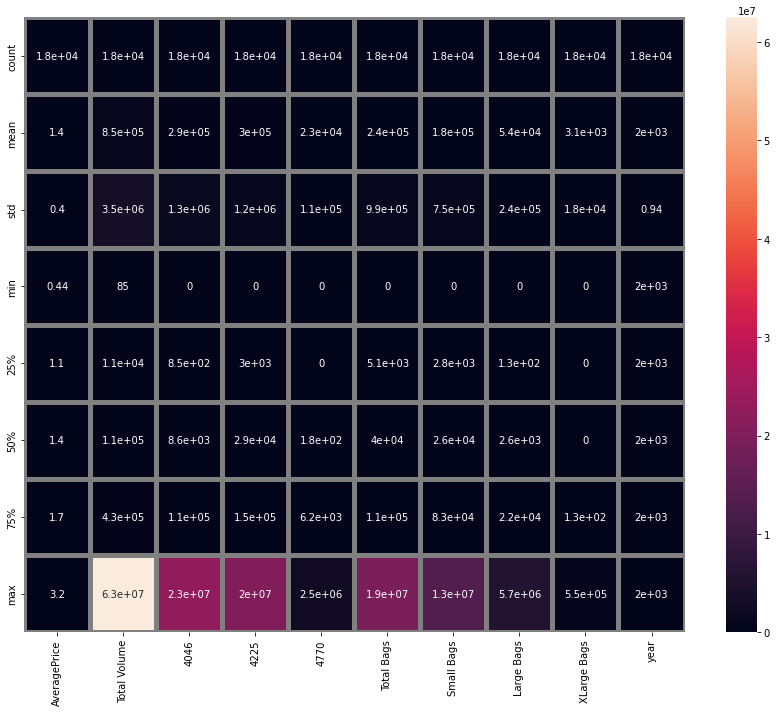

In [11]:
#graphical representation
plt.figure(figsize=(12,10))
sns.heatmap(d,annot=True,linecolor='grey',linewidths=5)
plt.tight_layout()

Conclusion from the 1st part:

1)Imported the required libraries.

2)Loaded the data set.

3)Used different pandas methods to know about the dataset.

4)Checked for any missing values

5)Showed the data summary.

Now we explore the target variable i.e Average Price ....

Since average price consists of continuous variables, the problem is regression type problem.

1.15    202
1.18    199
1.08    194
1.26    193
1.13    192
       ... 
3.25      1
3.12      1
2.68      1
3.03      1
3.17      1
Name: AveragePrice, Length: 259, dtype: int64


<AxesSubplot:xlabel='AveragePrice', ylabel='Density'>

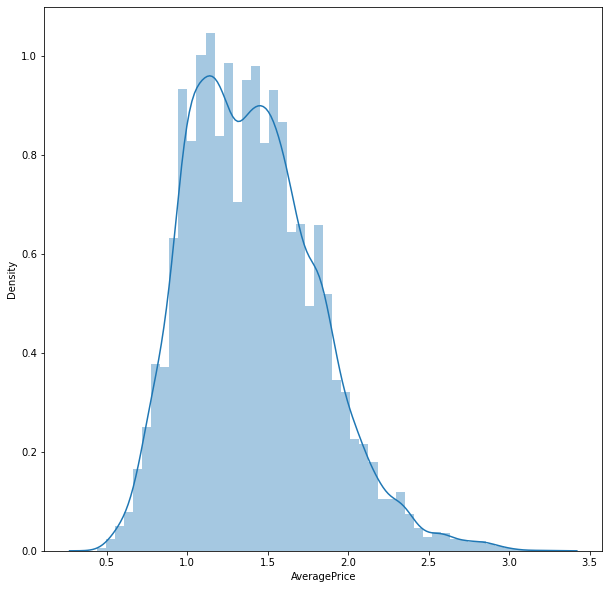

In [12]:
#Visualizing the target variable
print(df['AveragePrice'].value_counts())

plt.figure(figsize=(10,10))
sns.distplot(df['AveragePrice'])

The distribution seems a normal for target variable i.e Average Price

# EDA : Univariate Analysis

Now we visualize the feature variables in our data set.

1]Distplot 

<AxesSubplot:xlabel='Total Volume', ylabel='Density'>

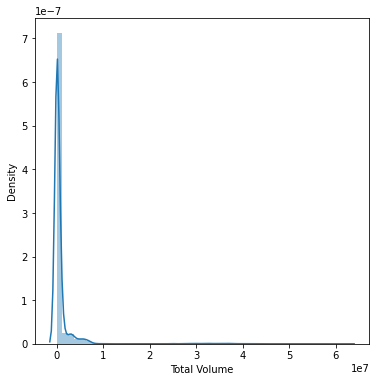

In [13]:
plt.figure(figsize=(6,6))

#distplot:-Total Volume
sns.distplot(df['Total Volume'])

<AxesSubplot:xlabel='4046', ylabel='Density'>

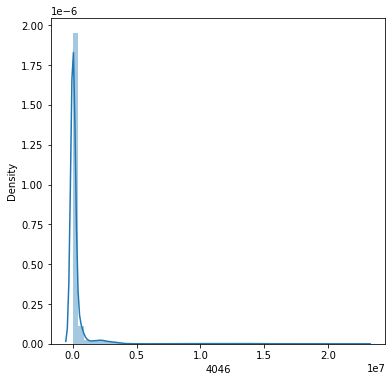

In [14]:
plt.figure(figsize=(6,6))

#distplot:-4046
sns.distplot(df['4046'])

<AxesSubplot:xlabel='4225', ylabel='Density'>

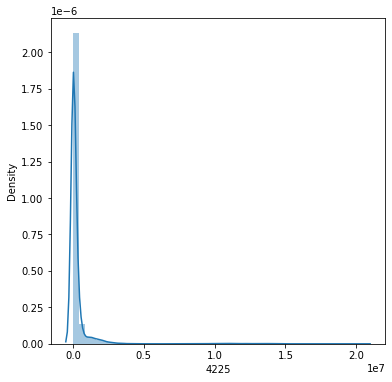

In [15]:
plt.figure(figsize=(6,6))

#distplot:-4225
sns.distplot(df['4225'])

<AxesSubplot:xlabel='4770', ylabel='Density'>

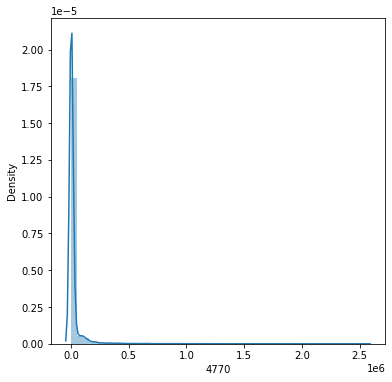

In [16]:
plt.figure(figsize=(6,6))

#distplot:-4770
sns.distplot(df['4770'])

<AxesSubplot:xlabel='Total Bags', ylabel='Density'>

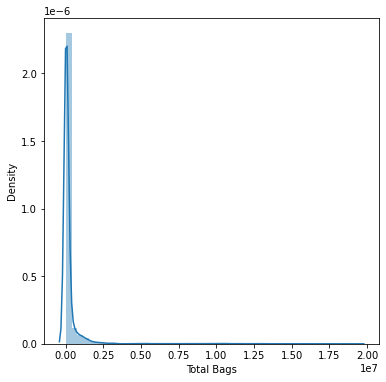

In [17]:
plt.figure(figsize=(6,6))

#distplot:-Total Bags
sns.distplot(df['Total Bags'])

<AxesSubplot:xlabel='Small Bags', ylabel='Density'>

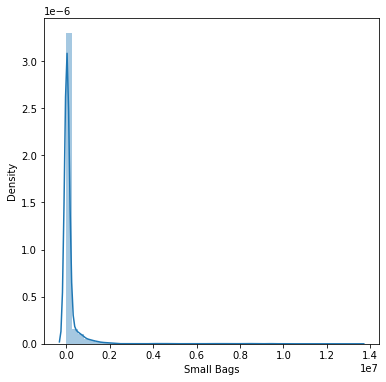

In [18]:
plt.figure(figsize=(6,6))

#distplot:-Small Bags
sns.distplot(df['Small Bags'])

<AxesSubplot:xlabel='Large Bags', ylabel='Density'>

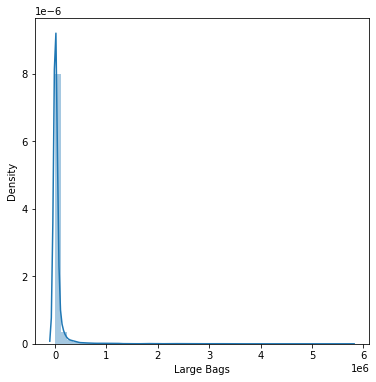

In [19]:
plt.figure(figsize=(6,6))

#distplot:-Large Bags
sns.distplot(df['Large Bags'])

<AxesSubplot:xlabel='XLarge Bags', ylabel='Density'>

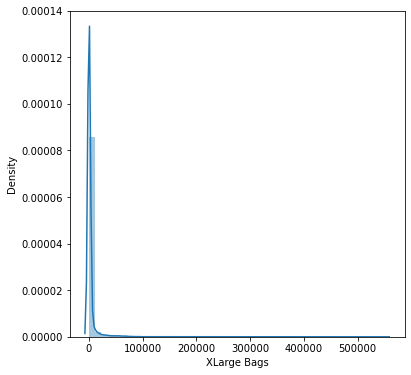

In [20]:
plt.figure(figsize=(6,6))

#distplot:-XLarge Bags
sns.distplot(df['XLarge Bags'])

<AxesSubplot:xlabel='year', ylabel='Density'>

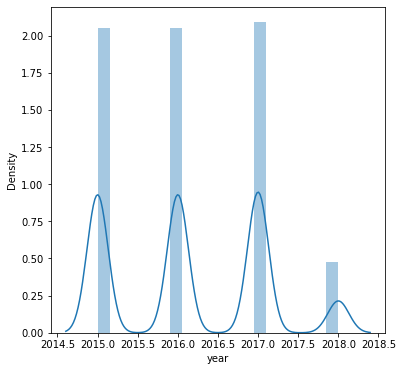

In [21]:
plt.figure(figsize=(6,6))

#distplot:-Year
sns.distplot(df['year'])

Using Violin Plot we will explore the data more efficiently.

2]Violin Plot : combination of boxplot and kernel density plot


<AxesSubplot:xlabel='year'>

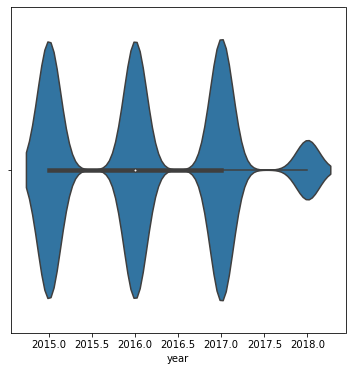

In [23]:
plt.figure(figsize=(6,6))

sns.violinplot(df['year'])

<AxesSubplot:xlabel='Total Volume'>

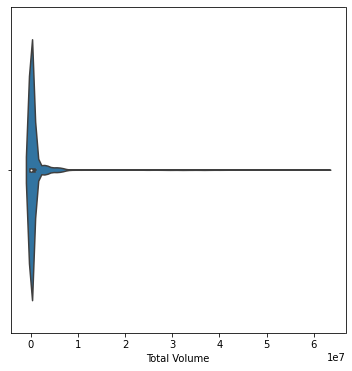

In [24]:
plt.figure(figsize=(6,6))

sns.violinplot(df['Total Volume'])

<AxesSubplot:xlabel='4046'>

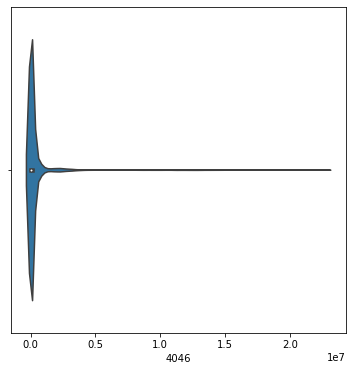

In [25]:
plt.figure(figsize=(6,6))

sns.violinplot(df['4046'])

<AxesSubplot:xlabel='4225'>

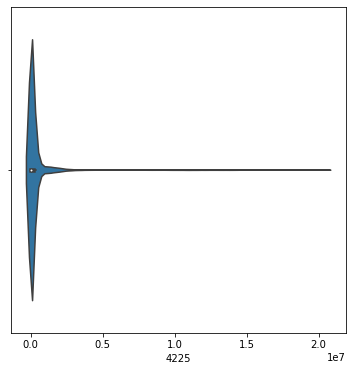

In [26]:
plt.figure(figsize=(6,6))

sns.violinplot(df['4225'])

<AxesSubplot:xlabel='4770'>

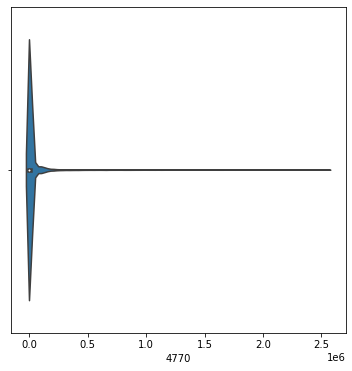

In [27]:
plt.figure(figsize=(6,6))

sns.violinplot(df['4770'])

<AxesSubplot:xlabel='Total Bags'>

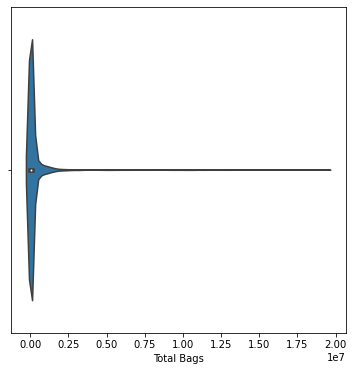

In [28]:
plt.figure(figsize=(6,6))

sns.violinplot(df['Total Bags'])

<AxesSubplot:xlabel='Small Bags'>

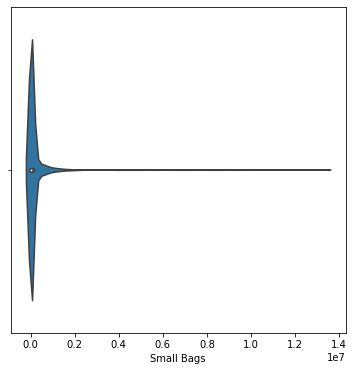

In [29]:
plt.figure(figsize=(6,6))

sns.violinplot(df['Small Bags'])

<AxesSubplot:xlabel='Large Bags'>

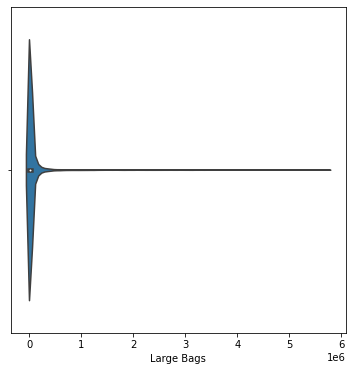

In [30]:
plt.figure(figsize=(6,6))

sns.violinplot(df['Large Bags'])

<AxesSubplot:xlabel='XLarge Bags'>

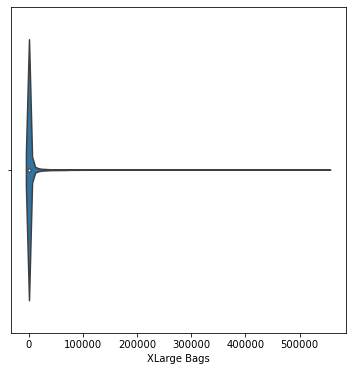

In [31]:
plt.figure(figsize=(6,6))

sns.violinplot(df['XLarge Bags'])

Now I will explore the categorical variables.

In [32]:
cat_var = df.select_dtypes(include=['object'])

In [33]:
cat_var

,Date,type,region
0,2015-12-27,conventional,Albany
1,2015-12-20,conventional,Albany
2,2015-12-13,conventional,Albany
3,2015-12-06,conventional,Albany
4,2015-11-29,conventional,Albany
...,...,...,...
18244,2018-02-04,organic,WestTexNewMexico
18245,2018-01-28,organic,WestTexNewMexico
18246,2018-01-21,organic,WestTexNewMexico
18247,2018-01-14,organic,WestTexNewMexico


1]Countplot

<AxesSubplot:xlabel='year', ylabel='count'>

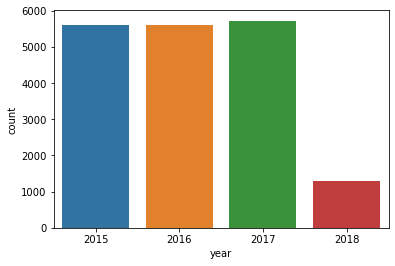

In [34]:
#Visualization of categorical variables
sns.countplot(df['year'])

2015-12-27    108
2017-12-24    108
2017-12-10    108
2017-12-03    108
2017-11-26    108
             ... 
2016-11-06    108
2018-01-07    108
2017-06-18    107
2017-06-25    107
2015-12-06    107
Name: Date, Length: 169, dtype: int64


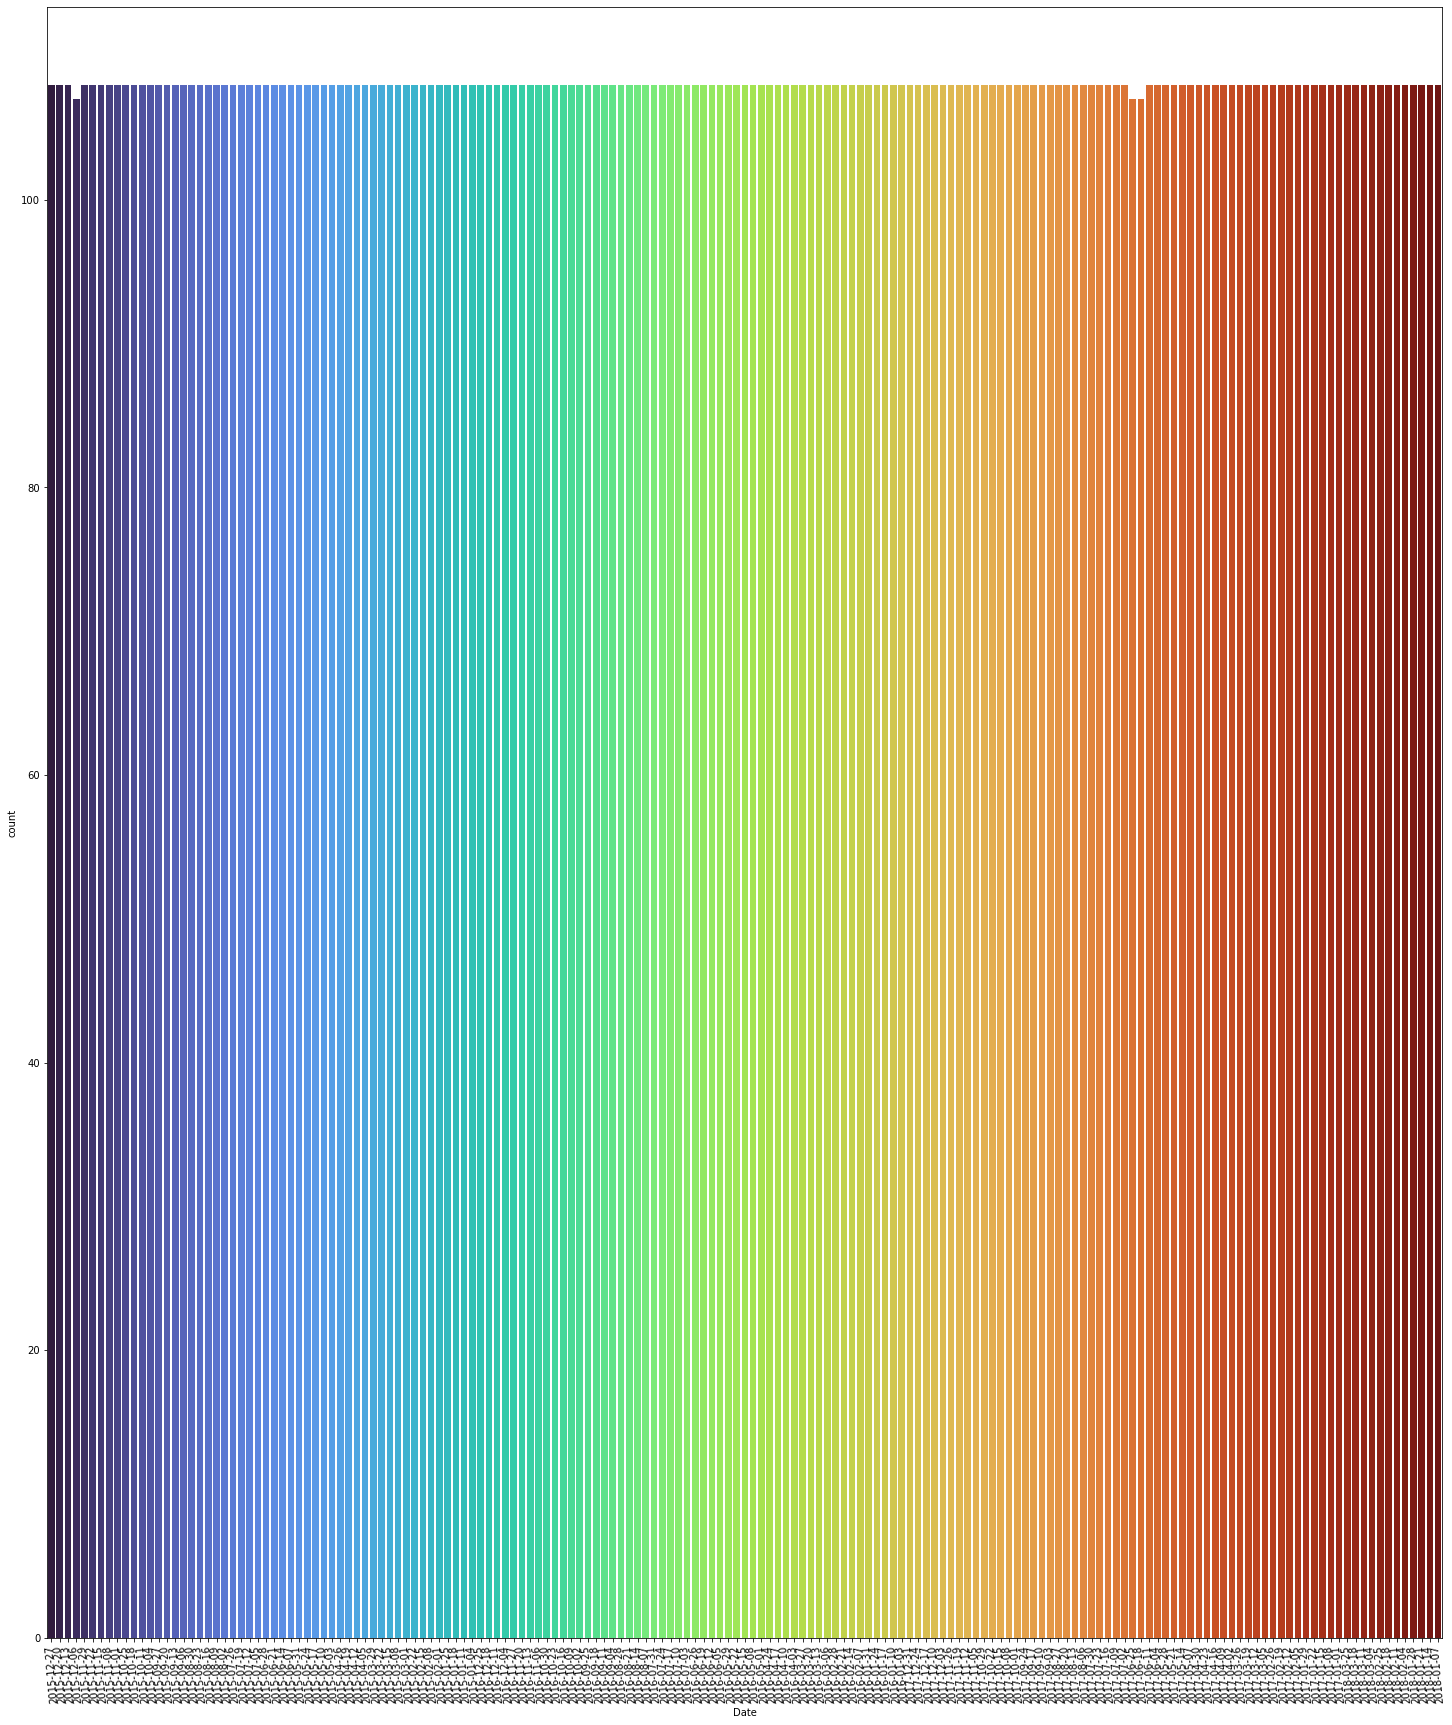

In [35]:
print(df['Date'].value_counts())
plt.figure(figsize=(25,30))
sns.countplot(df['Date'],palette='turbo')
plt.xticks(rotation=95)
plt.show()

conventional    9126
organic         9123
Name: type, dtype: int64


<AxesSubplot:xlabel='type', ylabel='count'>

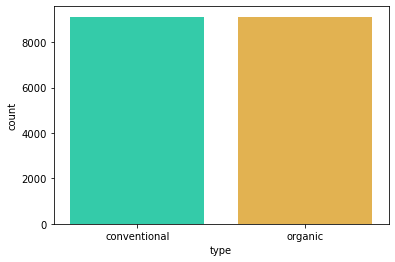

In [36]:
print(df['type'].value_counts())
sns.countplot(df['type'],palette='turbo')

Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
C

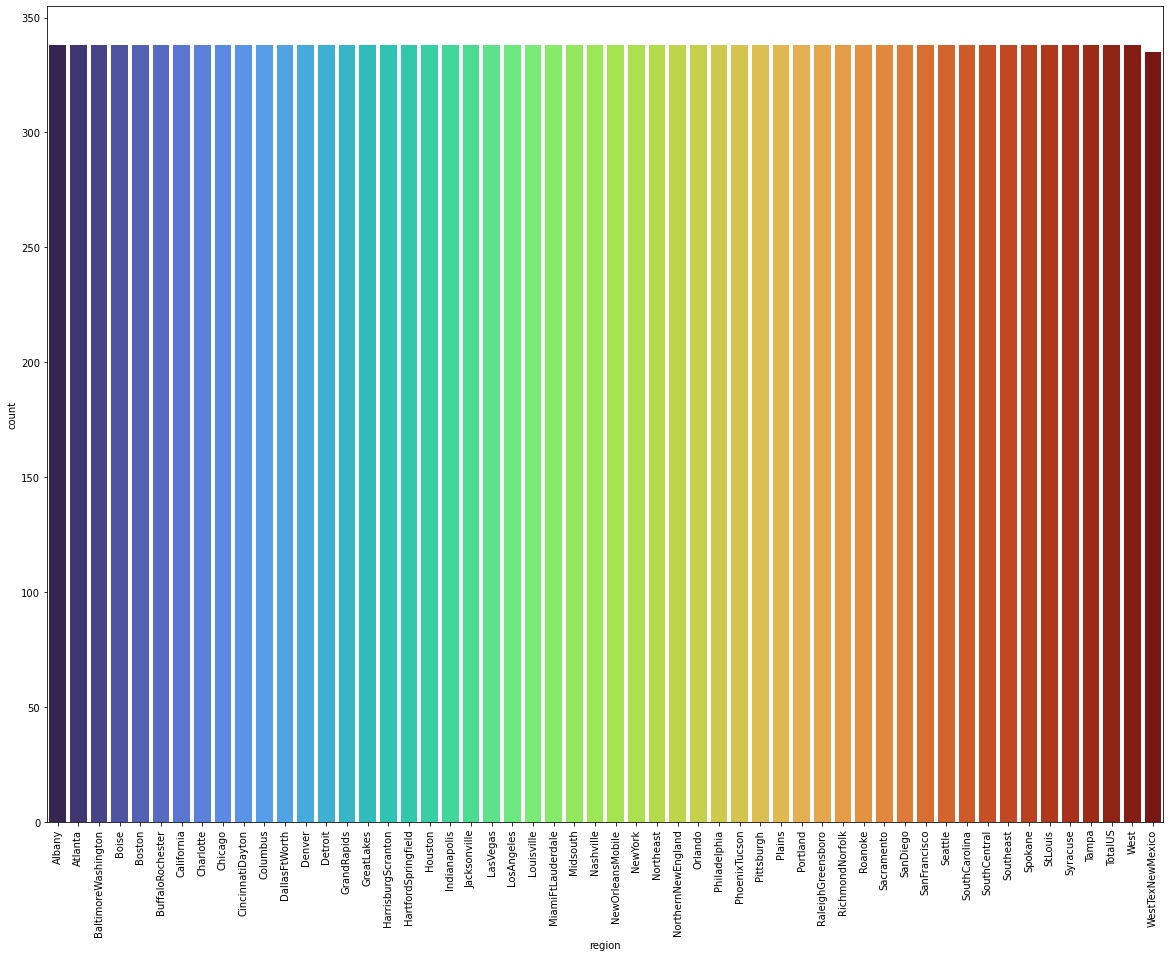

In [37]:
print(df['region'].value_counts())
plt.figure(figsize=(20,15))
sns.countplot(df['region'],palette='turbo')
plt.xticks(rotation=90)
plt.show()

Before doing bivariate analysis we will check for skewness of our data.

In [38]:
df.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
year             0.215339
dtype: float64

There is skewness in every column of our dataset.So we will tune it in the latter stages.

# 2]Bivariate Analysis

1.Scatter Plot

We will see a relationship between our features and target variable.

<AxesSubplot:xlabel='Total Volume', ylabel='AveragePrice'>

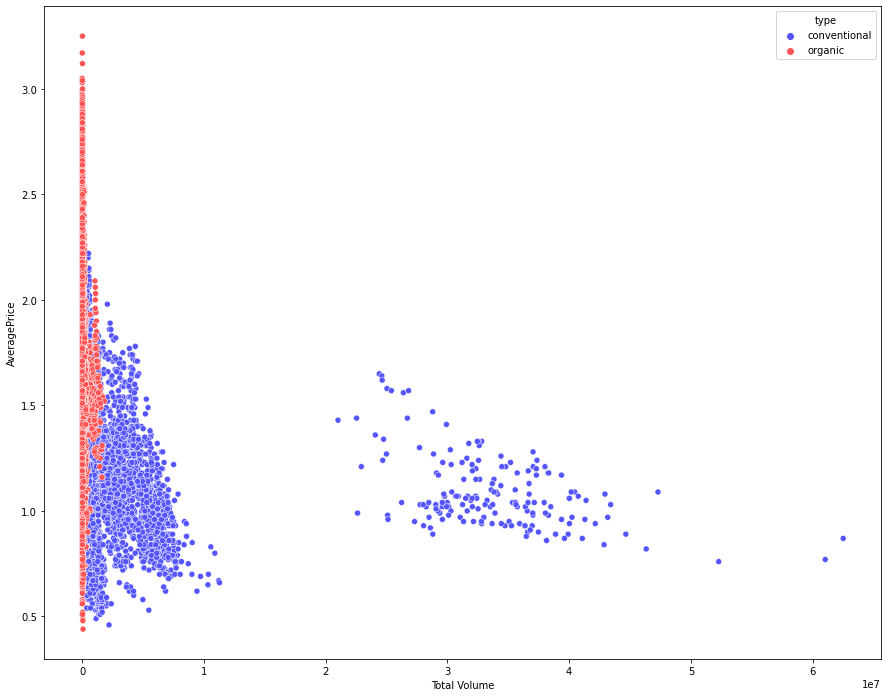

In [39]:
#bivariate analysis of numerical and categorical variables

plt.figure(figsize=(15,12))
sns.scatterplot(x=df['Total Volume'],y=df['AveragePrice'],hue=df['type'],palette='seismic')

<AxesSubplot:xlabel='4046', ylabel='AveragePrice'>

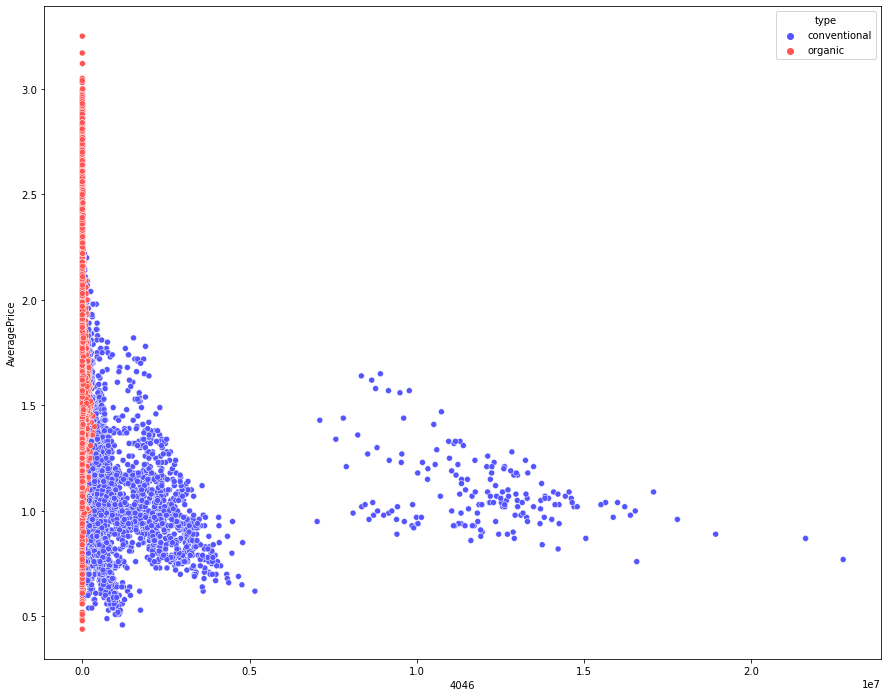

In [40]:
plt.figure(figsize=(15,12))
sns.scatterplot(x=df['4046'],y=df['AveragePrice'],hue=df['type'],palette='seismic')

<AxesSubplot:xlabel='4225', ylabel='AveragePrice'>

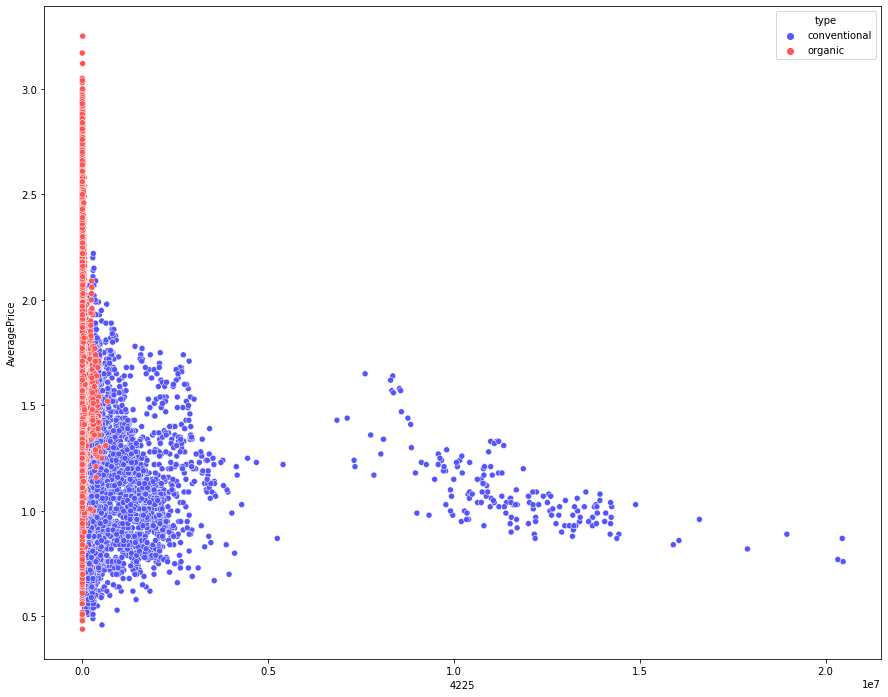

In [41]:
plt.figure(figsize=(15,12))
sns.scatterplot(x=df['4225'],y=df['AveragePrice'],hue=df['type'],palette='seismic')

<AxesSubplot:xlabel='4770', ylabel='AveragePrice'>

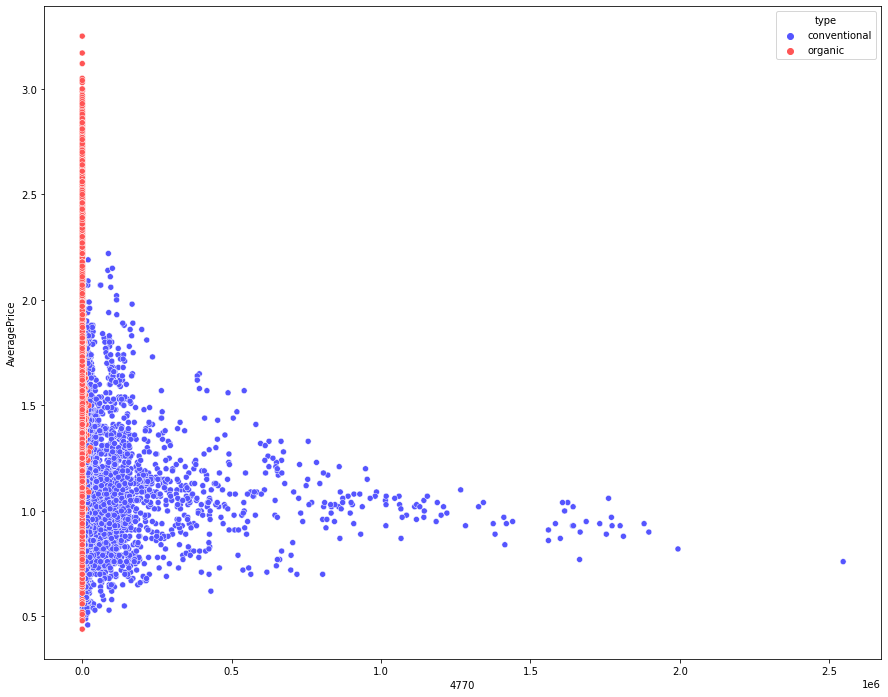

In [42]:
plt.figure(figsize=(15,12))
sns.scatterplot(x=df['4770'],y=df['AveragePrice'],hue=df['type'],palette='seismic')

<AxesSubplot:xlabel='Total Bags', ylabel='AveragePrice'>

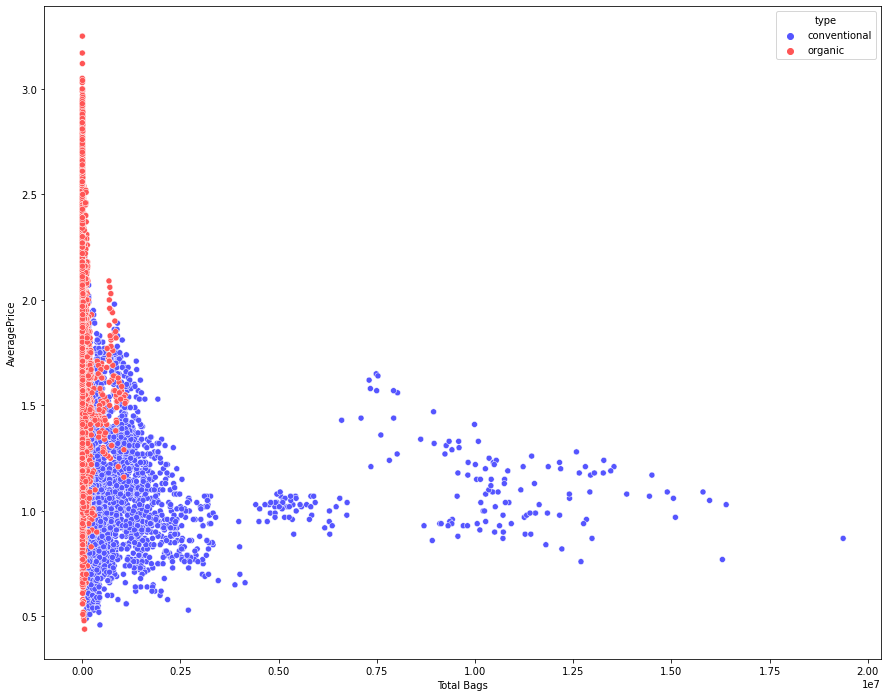

In [43]:
plt.figure(figsize=(15,12))
sns.scatterplot(x=df['Total Bags'],y=df['AveragePrice'],hue=df['type'],palette='seismic')

<AxesSubplot:xlabel='Small Bags', ylabel='AveragePrice'>

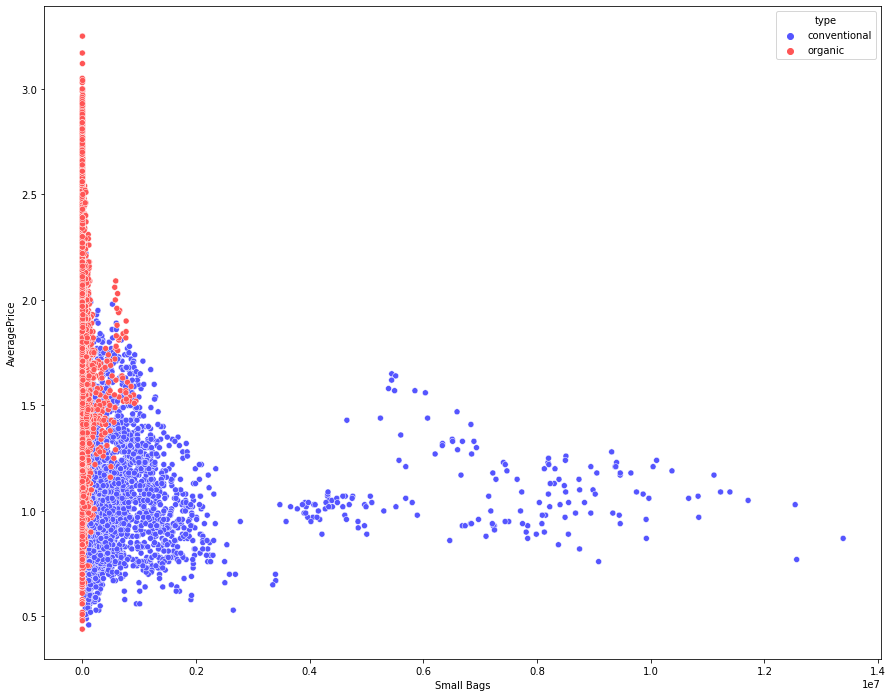

In [44]:
plt.figure(figsize=(15,12))
sns.scatterplot(x=df['Small Bags'],y=df['AveragePrice'],hue=df['type'],palette='seismic')

<AxesSubplot:xlabel='Large Bags', ylabel='AveragePrice'>

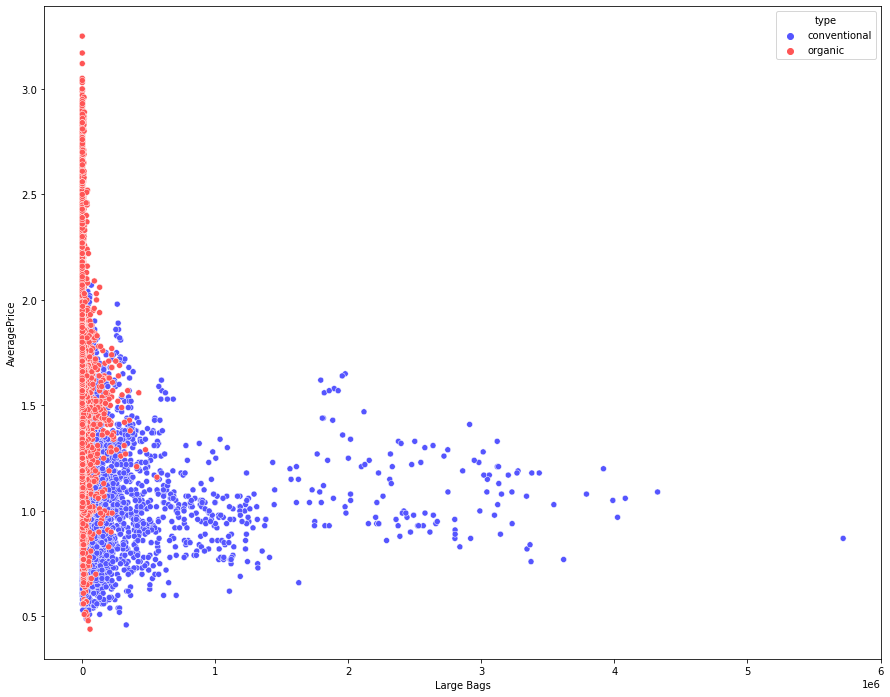

In [45]:
plt.figure(figsize=(15,12))
sns.scatterplot(x=df['Large Bags'],y=df['AveragePrice'],hue=df['type'],palette='seismic')

<AxesSubplot:xlabel='XLarge Bags', ylabel='AveragePrice'>

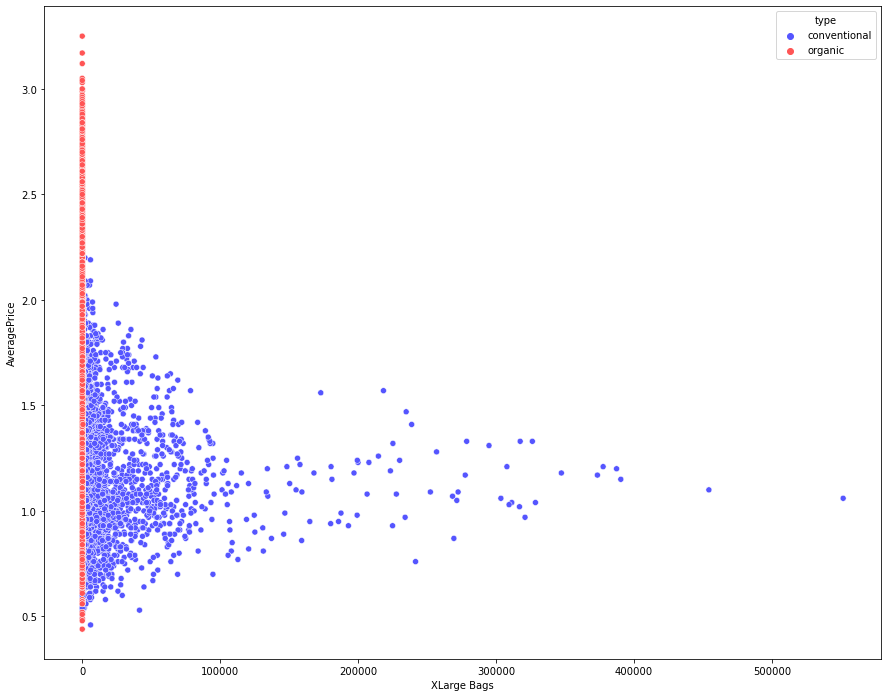

In [46]:
plt.figure(figsize=(15,12))
sns.scatterplot(x=df['XLarge Bags'],y=df['AveragePrice'],hue=df['type'],palette='seismic')

<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

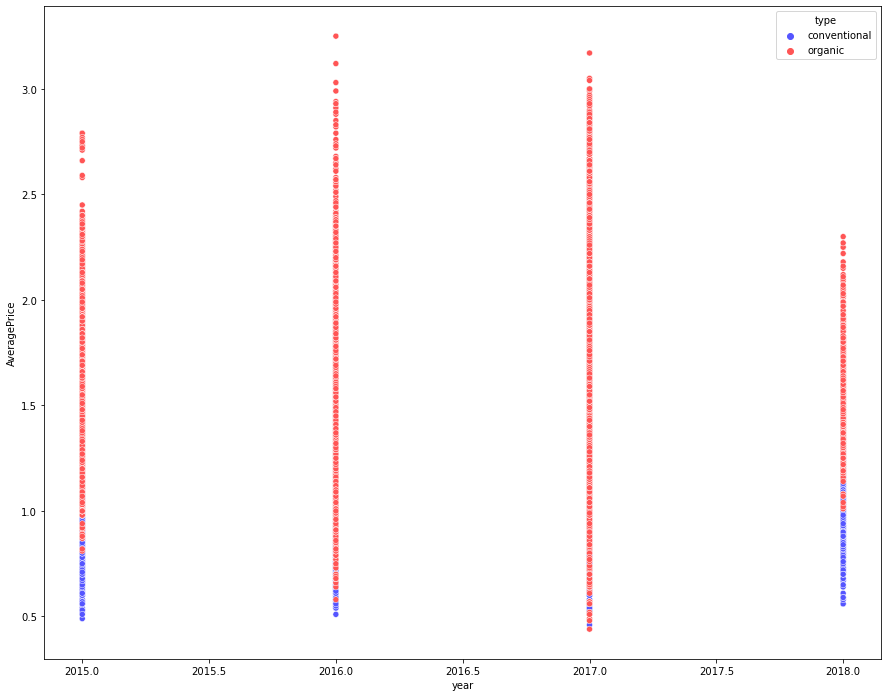

In [47]:
plt.figure(figsize=(15,12))
sns.scatterplot(x=df['year'],y=df['AveragePrice'],hue=df['type'],palette='seismic')

<AxesSubplot:xlabel='Date', ylabel='AveragePrice'>

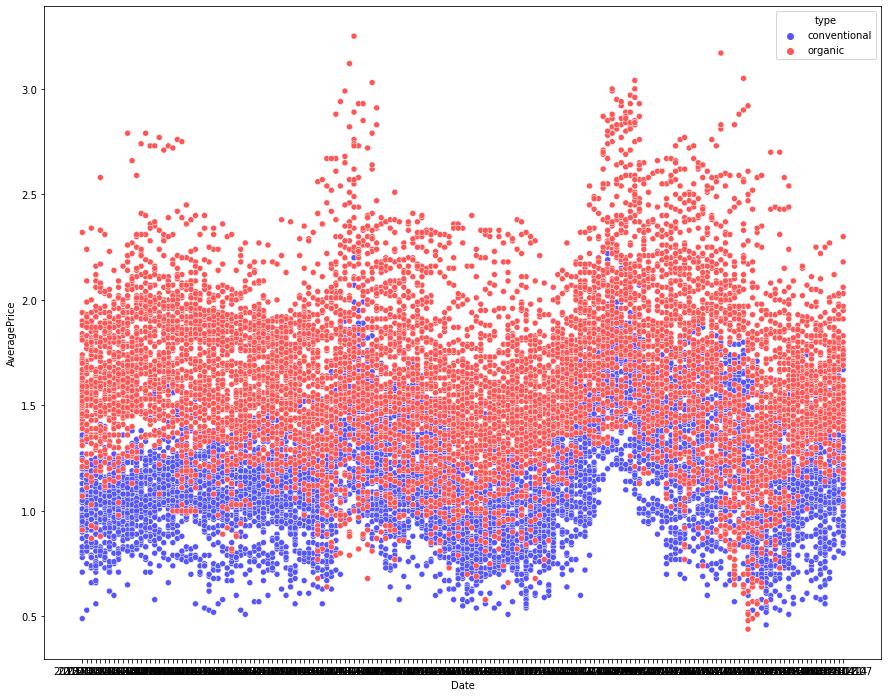

In [48]:
plt.figure(figsize=(15,12))
sns.scatterplot(x=df['Date'],y=df['AveragePrice'],hue=df['type'],palette='seismic')

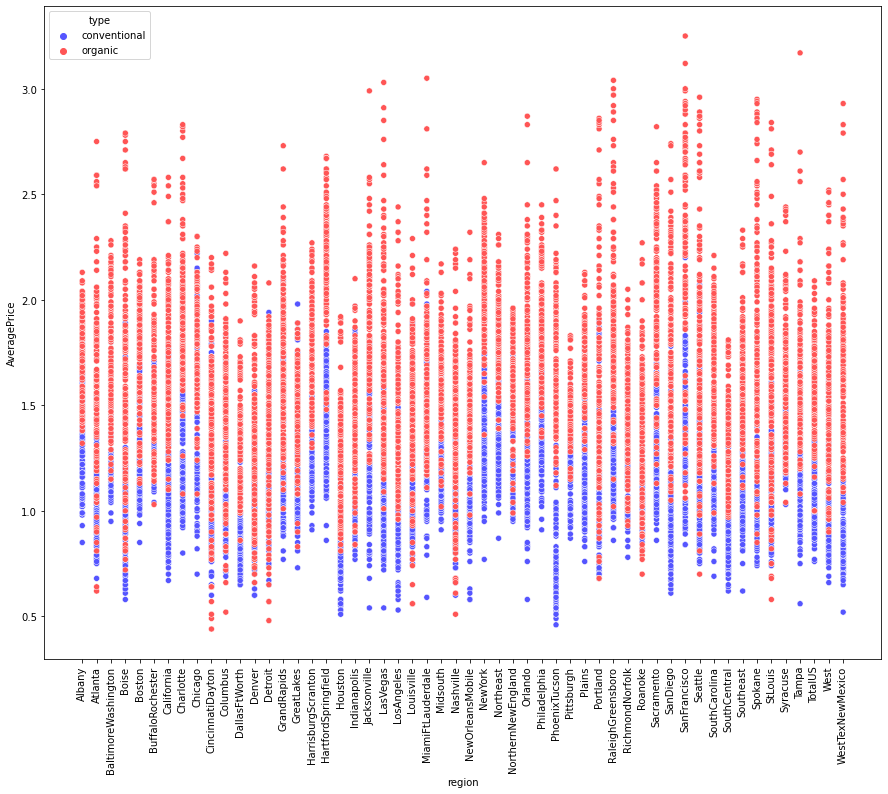

In [49]:
plt.figure(figsize=(15,12))
sns.scatterplot(x=df['region'],y=df['AveragePrice'],hue=df['type'],palette='seismic')
plt.xticks(rotation=90)
plt.show()

Based on the above cells the relationship between the features and target variable seems to be in positive manner.

2.Catplot

<Figure size 1080x864 with 0 Axes>

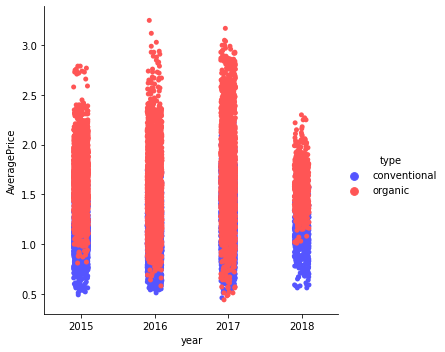

In [50]:
plt.figure(figsize=(15,12))
sns.catplot(x='year',y='AveragePrice',hue='type',data=df,palette='seismic')

<Figure size 1080x864 with 0 Axes>

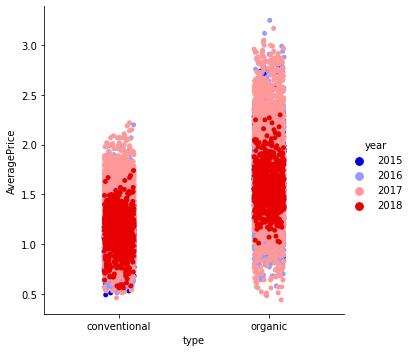

In [51]:
plt.figure(figsize=(15,12))
sns.catplot(x='type',y='AveragePrice',hue='year',data=df,palette='seismic')

The column Date is not contributing to our dataset so we will drop the 'Date' column.

In [52]:
df = df.drop(['Date'],axis=1)
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


Now the next part of the process is to convert categorical variables to numerical variables.

# Encoding

In [53]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [54]:
#Dropping the Date column from the created categorical variables.
cat_var.drop(['Date'],axis=1,inplace=True)

cat_var.head()

,type,region
0,conventional,Albany
1,conventional,Albany
2,conventional,Albany
3,conventional,Albany
4,conventional,Albany


We will use encoding technique called Label Encoding.

Label Encoding target labels with value between 0 and n_classes-1

In [55]:
#Import library for encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le

LabelEncoder()

In [56]:
for feature in cat_var:
    df[feature] = le.fit_transform(df[feature])
    df[feature]
df.head(5)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0


We will use label encoder for column 'year' as it contains data in discrete numerical format and it help us for our 
model building.

In [57]:
df['year'] = le.fit_transform(df['year'])

df['year']


0        0
1        0
2        0
3        0
4        0
        ..
18244    3
18245    3
18246    3
18247    3
18248    3
Name: year, Length: 18249, dtype: int64

In [58]:
df.sample(5)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
7979,1.41,393303.27,181618.56,78082.98,2859.86,130741.87,102225.45,23365.63,5150.79,0,2,44
16021,1.96,6103.24,64.69,911.14,0.00,5127.41,4226.66,900.75,0.00,1,2,24
8609,0.84,256757.60,112638.98,32262.19,4167.93,107688.50,89971.36,17360.90,356.24,0,3,10
10361,1.63,1219.02,0.00,685.41,0.00,533.61,279.31,254.30,0.00,1,0,23
5764,1.60,763783.58,72820.10,476272.30,9389.51,205301.67,202870.46,2051.49,379.72,0,2,2


Now we check for outliers.If present we will remove it.

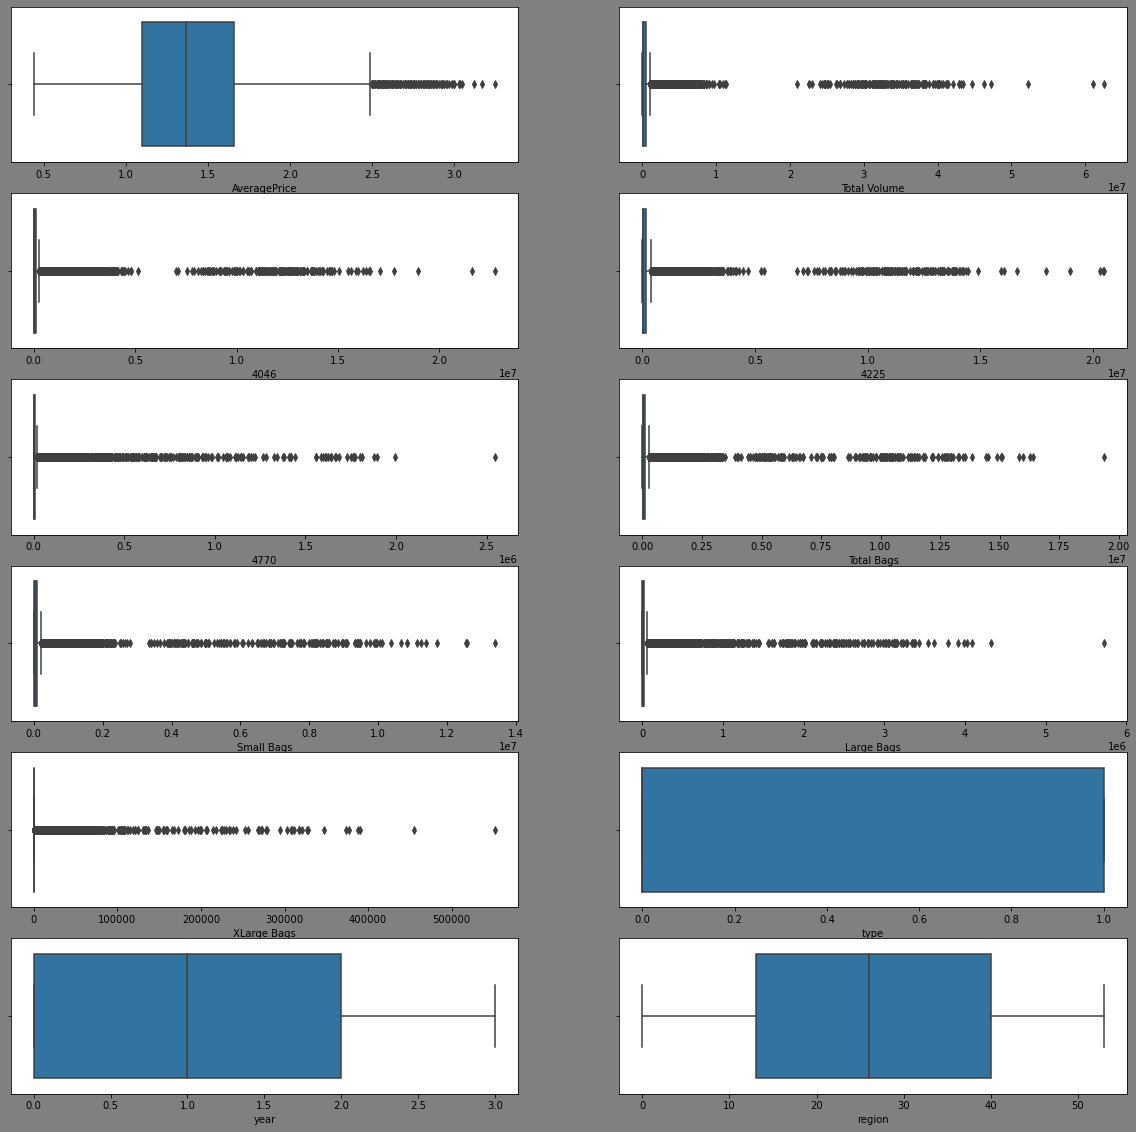

In [59]:
plt.figure(figsize=(20,20),facecolor='grey')
plotno = 1
for i in df:
    if plotno <= 12:
        ax = plt.subplot(6,2,plotno)
        sns.boxplot(df[i])
    plotno += 1
plt.show()

In [60]:
q1 = df.quantile(0.10)
q3 = df.quantile(0.90)

In [61]:
print(q1)
print(q3)

AveragePrice       0.930
Total Volume    3896.768
4046              94.276
4225             367.484
4770               0.000
Total Bags      1299.208
Small Bags       583.110
Large Bags         0.000
XLarge Bags        0.000
type               0.000
year               0.000
region             5.000
Name: 0.1, dtype: float64
AveragePrice          1.930
Total Volume    1387045.760
4046             538385.184
4225             500784.552
4770              31492.442
Total Bags       442141.928
Small Bags       354266.852
Large Bags        94295.338
XLarge Bags        3688.912
type                  1.000
year                  2.000
region               48.000
Name: 0.9, dtype: float64


Total Volume

In [62]:
df['Total Volume'].quantile(0.90)

1387045.7600000002

<AxesSubplot:xlabel='Total Volume'>

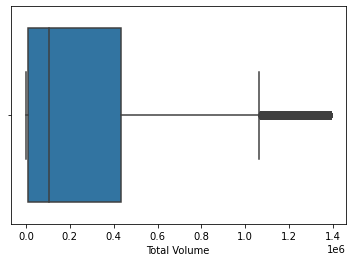

In [63]:
df['Total Volume'] = np.where(df['Total Volume'] > 1387045.7600000002,1387045.7600000002,df['Total Volume'])

sns.boxplot(df['Total Volume'])

4046

In [64]:
df['4046'].quantile(0.90)

538385.184

<AxesSubplot:xlabel='4046'>

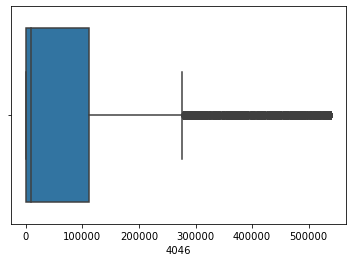

In [65]:
df['4046'] = np.where(df['4046'] > 538385.184,538385.184,df['4046'])

sns.boxplot(df['4046'])

4225

In [66]:
df['4225'].quantile(0.90)

500784.5520000004

<AxesSubplot:xlabel='4225'>

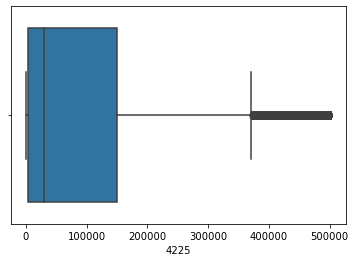

In [67]:
df['4225'] = np.where(df['4225'] > 500784.5520000004,500784.5520000004,df['4225'])

sns.boxplot(df['4225'])

4770

In [68]:
df['4770'].quantile(0.90)

31492.442000000035

<AxesSubplot:xlabel='4770'>

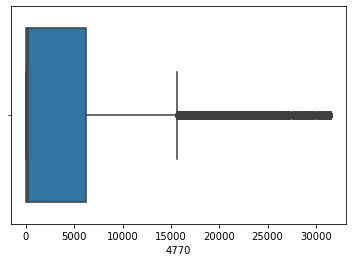

In [69]:
df['4770'] = np.where(df['4770'] > 31492.442000000035,31492.442000000035,df['4770'])

sns.boxplot(df['4770'])

Total Bags

In [70]:
df['Total Bags'].quantile(0.90)

442141.9280000002

<AxesSubplot:xlabel='Total Bags'>

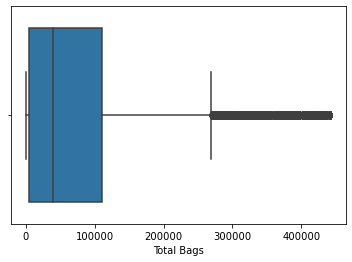

In [71]:
df['Total Bags'] = np.where(df['Total Bags'] > 442141.9280000002,442141.9280000002,df['Total Bags'])

sns.boxplot(df['Total Bags'])

Small Bags

In [72]:
df['Small Bags'].quantile(0.90)

354266.85200000025

<AxesSubplot:xlabel='Small Bags'>

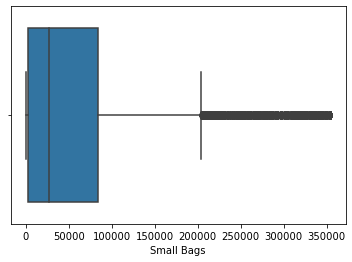

In [73]:
df['Small Bags'] = np.where(df['Small Bags'] > 354266.85200000025,354266.85200000025,df['Small Bags'])

sns.boxplot(df['Small Bags'])

Large Bags

In [74]:
df['Large Bags'].quantile(0.90)

94295.33800000006

<AxesSubplot:xlabel='Large Bags'>

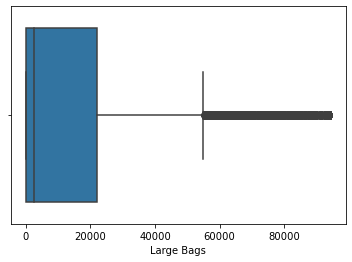

In [75]:
df['Large Bags'] = np.where(df['Large Bags'] > 94295.33800000006,94295.33800000006,df['Large Bags'])

sns.boxplot(df['Large Bags'])

XLarge Bags

In [76]:
df['XLarge Bags'].quantile(0.90)

3688.912

<AxesSubplot:xlabel='XLarge Bags'>

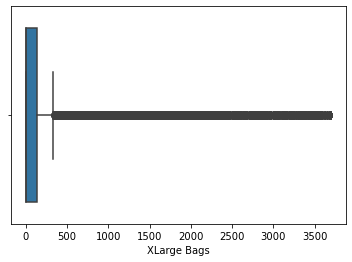

In [77]:
df['XLarge Bags'] = np.where(df['XLarge Bags'] > 3688.912,3688.912,df['XLarge Bags'])

sns.boxplot(df['XLarge Bags'])

Average Price

In [78]:
df['AveragePrice'].quantile(0.90)

1.93

<AxesSubplot:xlabel='AveragePrice'>

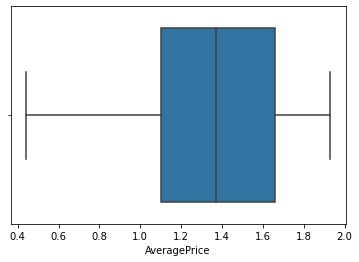

In [79]:
df['AveragePrice'] = np.where(df['AveragePrice'] > 1.93,1.93,df['AveragePrice'])

sns.boxplot(df['AveragePrice'])

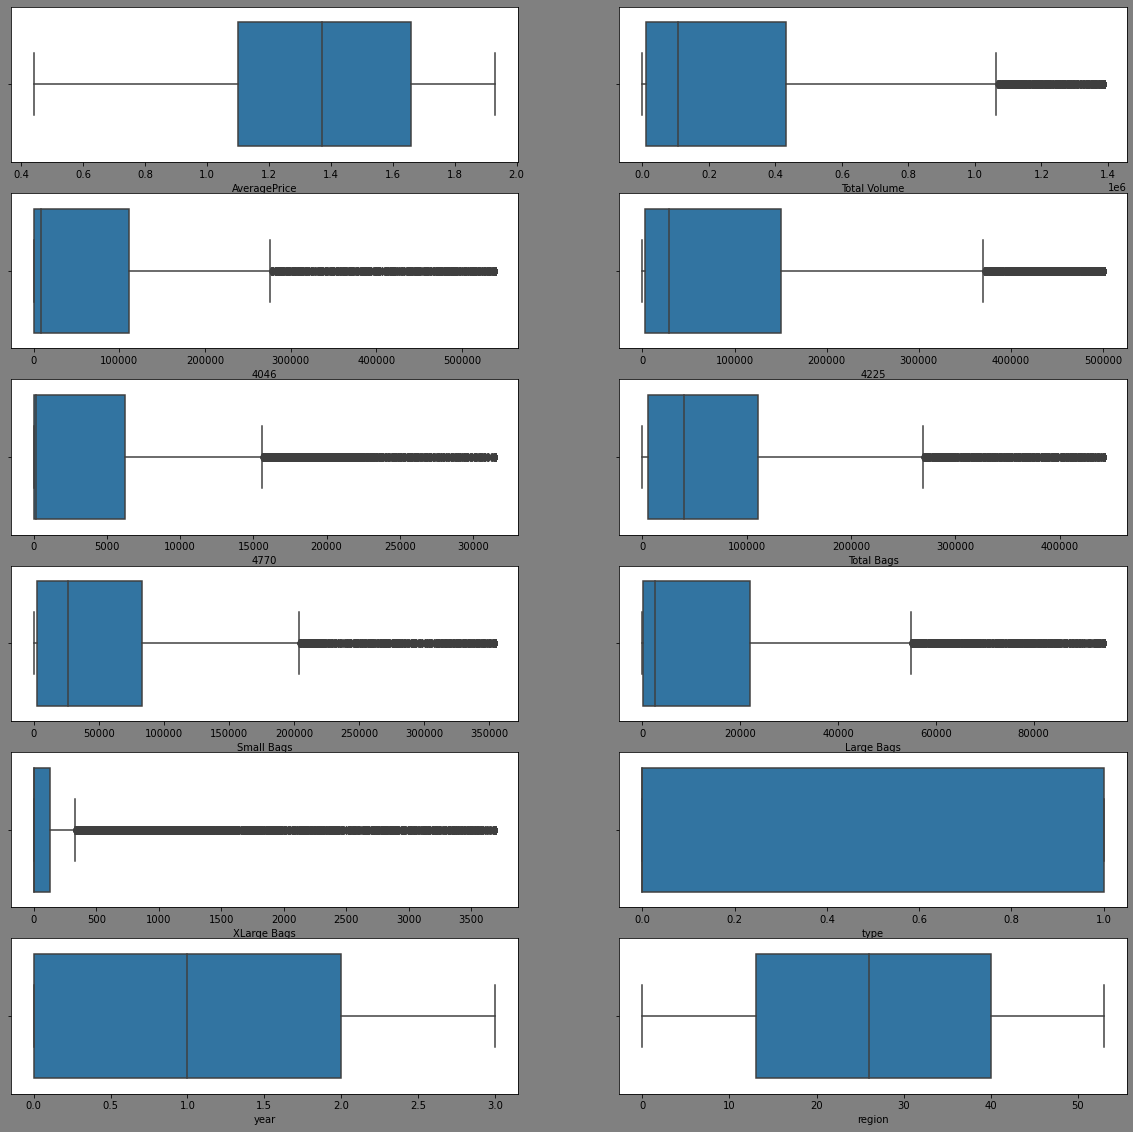

In [80]:
plt.figure(figsize=(20,20),facecolor='grey')
plotno = 1
for i in df:
    if plotno <= 12:
        ax = plt.subplot(6,2,plotno)
        sns.boxplot(df[i])
    plotno += 1
plt.show()

We have removed quite a few outliers but still there are outliers present.We will have to use multicollinearity factor bewteen the variables to check if any variables are highly correlated or not. 

In [81]:
df.skew()

AveragePrice   -0.010028
Total Volume    1.466105
4046            1.816082
4225            1.469341
4770            1.713361
Total Bags      1.652200
Small Bags      1.754344
Large Bags      1.644416
XLarge Bags     1.977451
type            0.000329
year            0.215339
region          0.000030
dtype: float64

# Correlation Matrix

In [86]:
df_corr = df.corr()

df_corr

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
AveragePrice,1.000000,-0.499926,-0.515738,-0.403004,-0.433810,-0.449799,-0.409807,-0.421879,-0.290447,0.636412,0.083905,-0.026235
Total Volume,-0.499926,1.000000,0.880916,0.917904,0.725665,0.934970,0.922344,0.732412,0.580820,-0.616087,0.037504,0.112561
4046,-0.515738,0.880916,1.000000,0.699608,0.645136,0.799399,0.779100,0.681769,0.556160,-0.543526,0.014758,0.155739
4225,-0.403004,0.917904,0.699608,1.000000,0.724186,0.822607,0.837082,0.590512,0.547822,-0.592490,-0.008453,0.049669
4770,-0.433810,0.725665,0.645136,0.724186,1.000000,0.660287,0.670422,0.454246,0.592043,-0.543383,-0.081669,0.012981
Total Bags,-0.449799,0.934970,0.799399,0.822607,0.660287,1.000000,0.969241,0.795105,0.572088,-0.548226,0.128092,0.133141
Small Bags,-0.409807,0.922344,0.779100,0.837082,0.670422,0.969241,1.000000,0.669946,0.580514,-0.535764,0.105123,0.132998
Large Bags,-0.421879,0.732412,0.681769,0.590512,0.454246,0.795105,0.669946,1.000000,0.415429,-0.431237,0.139500,0.164718
XLarge Bags,-0.290447,0.580820,0.556160,0.547822,0.592043,0.572088,0.580514,0.415429,1.000000,-0.469582,0.139270,0.004361
type,0.636412,-0.616087,-0.543526,-0.592490,-0.543383,-0.548226,-0.535764,-0.431237,-0.469582,1.000000,-0.000032,-0.000280


<AxesSubplot:>

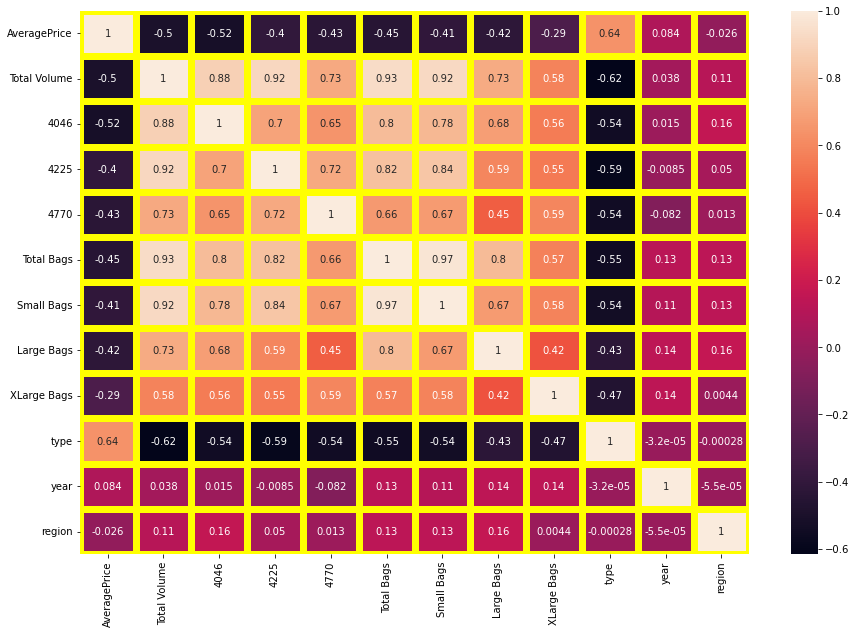

In [87]:
plt.figure(figsize=(15,10))
sns.heatmap(df_corr,annot=True,linecolor='yellow',linewidths=7)

In [88]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 

vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
vif['features'] = df.columns
vif

,vif,features
0,9.551840,AveragePrice
1,76.002779,Total Volume
2,11.737165,4046
3,19.577356,4225
4,3.407080,4770
5,81.262653,Total Bags
6,48.348390,Small Bags
7,7.442671,Large Bags
8,2.311224,XLarge Bags
9,4.495202,type


# Skewness Transformations

Performing transformations to remove the skewness

In [90]:
from sklearn.preprocessing import power_transform
X=power_transform(X,method='yeo-johnson')

In [91]:
X

array([[-0.13962027, -0.71065731,  0.32986352, ..., -0.99983562,
        -1.30842135, -2.01155231],
       [-0.21407312, -0.82750731,  0.23978984, ..., -0.99983562,
        -1.30842135, -2.01155231],
       [ 0.15690561, -0.78335668,  0.6635047 , ..., -0.99983562,
        -1.30842135, -2.01155231],
       ...,
       [-0.83265574, -0.6718846 , -0.84575055, ...,  1.00016441,
         1.70305268,  1.54383806],
       [-0.76288652, -0.60181259, -0.78467166, ...,  1.00016441,
         1.70305268,  1.54383806],
       [-0.72997116, -0.41471438, -0.85815326, ...,  1.00016441,
         1.70305268,  1.54383806]])

# VIF

Now I will use VIF to check for multicollinearity 

In [92]:
#Apply VIF

vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
vif['features'] = df.columns
vif

,vif,features
0,9.551840,AveragePrice
1,76.002779,Total Volume
2,11.737165,4046
3,19.577356,4225
4,3.407080,4770
5,81.262653,Total Bags
6,48.348390,Small Bags
7,7.442671,Large Bags
8,2.311224,XLarge Bags
9,4.495202,type


We will remove Total Volume , 4225 , Total Bags , Small Bags which are very correlated with each other.

In [ ]:
df = df.drop(['Total Volume','4225','Total Bags','Small Bags'],axis=1)
df.head()

Splitting the dataset into 2 variables namely 'X' and 'Y' for feature and label

In [95]:
#New values of X
X = df.drop(['AveragePrice'],axis=1)
Y = df['AveragePrice']

In [96]:
print(X.head())

print(X.shape)

      4046    4770  Large Bags  XLarge Bags  type  year  region
0  1036.74   48.16       93.25          0.0     0     0       0
1   674.28   58.33       97.49          0.0     0     0       0
2   794.70  130.50      103.14          0.0     0     0       0
3  1132.00   72.58      133.76          0.0     0     0       0
4   941.48   75.78      197.69          0.0     0     0       0
(18249, 7)


In [97]:
Y.head()

0    1.33
1    1.35
2    0.93
3    1.08
4    1.28
Name: AveragePrice, dtype: float64

# Feature Scaling

Now use Standard Scaler for transforming the variables in a standard manner.

In [98]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler

StandardScaler()

In [99]:
X_scaled = scaler.fit_transform(X)

X_scaled

array([[-0.58013733, -0.56470762, -0.61678143, ..., -0.99983562,
        -1.22128204, -1.7002522 ],
       [-0.5822471 , -0.56371741, -0.61664363, ..., -0.99983562,
        -1.22128204, -1.7002522 ],
       [-0.58154617, -0.55669055, -0.61646001, ..., -0.99983562,
        -1.22128204, -1.7002522 ],
       ...,
       [-0.57923407, -0.49852055, -0.61843693, ...,  1.00016441,
         1.97050371,  1.70081131],
       [-0.57728   , -0.4986111 , -0.61818701, ...,  1.00016441,
         1.97050371,  1.70081131],
       [-0.56932228, -0.54753528, -0.61896666, ...,  1.00016441,
         1.97050371,  1.70081131]])

# Building Our Model

First we will start with Linear Regression to find the best random state for building our Linear Regression Model.

# LINEAR REGRESSION

In [100]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import cross_val_score,KFold,ShuffleSplit,StratifiedKFold

In [101]:
maxAccuracy=0
maxRandomState=0

for i in range(1, 100):
    x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.30, random_state=i)
    lr=LinearRegression()
    lr.fit(x_train, y_train)
    y_lr = lr.predict(x_test)
    r2 = r2_score(y_test, y_lr)
    
    if r2>maxAccuracy:
        maxAccuracy=r2
        maxRandomState=i

print("Best r2 score is", maxAccuracy ," on Random State", maxRandomState)

Best r2 score is 0.49020073627301153  on Random State 6


The r2 score for Linear Regression with random State 6 is 0.4902

We will use cross validation methods to determine the r2 score for our model.

1]Hold Out Method

In [102]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.30, random_state=6)

#training our model
lr=LinearRegression()
lr.fit(x_train, y_train)

#Predicting y_test
y_lr = lr.predict(x_test)
r2 = r2_score(y_test, y_lr)

#R2 Score
print("R2 score : ", r2)

#Cross Validation Score
cross_val_lr = cross_val_score(lr,X_scaled,Y,cv=5)
print(cross_val_lr)
print("Cross Validation Score : ",cross_val_lr.mean())

#Error Estimation Methods
print("Mean Absolute Error :",mean_absolute_error(y_test,y_lr))
print("Mean Square Error : ",mean_squared_error(y_test,y_lr))
print("Root Mean Square Error :",np.sqrt(mean_squared_error(y_test,y_lr)))

R2 score :  0.49020073627301153
[-0.11343965  0.11066899  0.38921407 -0.03201882  0.00550021]
Cross Validation Score :  0.07198496181220457
Mean Absolute Error : 0.2033875023737307
Mean Square Error :  0.06327413349113487
Root Mean Square Error : 0.25154350218428395


2]K-Fold Cross Validation 

Provides train/test indices to split data in train/test sets. Split
dataset into k consecutive folds (without shuffling by default).

Each fold is then used once as a validation while the k - 1 remaining
folds form the training set.

In [103]:
#K-fold cross validation
K_fold = KFold(5,random_state=6,shuffle=True)
print(K_fold)
l1 = cross_val_score(lr,X_scaled,Y,cv=K_fold)
print(l1)
print("K-Fold Cross Validation Score : " , l1.mean())

KFold(n_splits=5, random_state=6, shuffle=True)
[0.47603077 0.50010413 0.45477453 0.45865074 0.44372232]
K-Fold Cross Validation Score :  0.46665649829141553


 3]Repeated Random Test-Train Split

In [104]:
#Shuffle Split
shuffle = ShuffleSplit(n_splits=5,test_size=0.30,random_state=6)
print(shuffle)
l2 = cross_val_score(lr,X_scaled,Y,cv=shuffle)
print(l2)
print("Shuffle Split : ",l2.mean())

ShuffleSplit(n_splits=5, random_state=6, test_size=0.3, train_size=None)
[0.49020074 0.48121743 0.46573665 0.46165118 0.46279669]
Shuffle Split :  0.47232053615023356


_____________________________________________________________________________________________________

Now we train with decision tree regressor to find the best fit for the model.

# Decison Tree 

In [105]:
from sklearn.tree import DecisionTreeRegressor

Finding best random state for the model

In [106]:
maxAccuracy=0
maxRandomState=0

for i in range(1, 100):
    x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.30, random_state=i)
    dt=DecisionTreeRegressor()
    dt.fit(x_train, y_train)
    y_dt = dt.predict(x_test)
    r2 = r2_score(y_test, y_dt)
    
    if r2>maxAccuracy:
        maxAccuracy=r2
        maxRandomState=i

print("Best r2 score is", maxAccuracy ," on Random State", maxRandomState)

Best r2 score is 0.6610718083617413  on Random State 6


In [107]:
#Hold Out Method

In [108]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.30, random_state=6)

#training our model
dt=DecisionTreeRegressor()
dt.fit(x_train, y_train)

#Predicting y_test
y_dt = dt.predict(x_test)
r2 = r2_score(y_test, y_dt)

#R2 Score
print("R2 score : ", r2)

#Cross Validation Score
cross_val_dt = cross_val_score(dt,X_scaled,Y,cv=5)
print(cross_val_dt)
print("Cross Validation Score : ",cross_val_dt.mean())

#Error Estimation Methods
print("Mean Absolute Error :",mean_absolute_error(y_test,y_dt))
print("Mean Square Error : ",mean_squared_error(y_test,y_dt))
print("Root Mean Square Error :",np.sqrt(mean_squared_error(y_test,y_dt)))

R2 score :  0.6633816430030783
[-1.16464939  0.07232866  0.16270656 -0.08196215 -0.39858794]
Cross Validation Score :  -0.28203285033557457
Mean Absolute Error : 0.14015495373584408
Mean Square Error :  0.04177965009301393
Root Mean Square Error : 0.20440070961964377


In [109]:
#K - fold Cross Validation

In [110]:
K_fold = KFold(5,random_state=6,shuffle=True)
print(K_fold)
l11 = cross_val_score(dt,X_scaled,Y,cv=K_fold)
print(l11)
print("K-Fold Cross Validation Score : " , l11.mean())

KFold(n_splits=5, random_state=6, shuffle=True)
[0.66879852 0.67799803 0.61496459 0.64370273 0.61253384]
K-Fold Cross Validation Score :  0.6435995428067016


In [111]:
#Shuffle Split

In [112]:
shuffle = ShuffleSplit(n_splits=5,test_size=0.30,random_state=6)
print(shuffle)
l21 = cross_val_score(dt,X_scaled,Y,cv=shuffle)
print(l21)
print("Shuffle Split : ",l21.mean())

ShuffleSplit(n_splits=5, random_state=6, test_size=0.3, train_size=None)
[0.67112975 0.64619365 0.63070389 0.63470877 0.63058733]
Shuffle Split :  0.6426646773851299


___________________________________________________________________________________________________________________________

# KNN

In [113]:
from sklearn.neighbors import KNeighborsRegressor

Finding best random state for the model

In [114]:
maxAccuracy=0
maxRandomState=0

for i in range(1, 100):
    x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.30, random_state=i)
    knn=KNeighborsRegressor()
    knn.fit(x_train, y_train)
    y_knn = knn.predict(x_test)
    r2 = r2_score(y_test, y_knn)
    
    if r2>maxAccuracy:
        maxAccuracy=r2
        maxRandomState=i

print("Best r2 score is", maxAccuracy ," on Random State", maxRandomState)

Best r2 score is 0.7732292642683862  on Random State 49


In [115]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.30, random_state=49)

#training our model
knn=KNeighborsRegressor()
knn.fit(x_train, y_train)

#Predicting y_test
y_knn = knn.predict(x_test)
r2 = r2_score(y_test, y_knn)

#R2 Score
print("R2 score : ", r2)

#Cross Validation Score
cross_val_knn = cross_val_score(knn,X_scaled,Y,cv=5)
print(cross_val_knn)
print("Cross Validation Score : ",cross_val_knn.mean())

#Error Estimation Methods
print("Mean Absolute Error :",mean_absolute_error(y_test,y_knn))
print("Mean Square Error : ",mean_squared_error(y_test,y_knn))
print("Root Mean Square Error :",np.sqrt(mean_squared_error(y_test,y_knn)))

R2 score :  0.7732292642683862
[-0.27861684  0.06732206  0.3478424   0.0872408  -0.14844214]
Cross Validation Score :  0.015069256754557902
Mean Absolute Error : 0.1196248401826484
Mean Square Error :  0.028113533515981733
Root Mean Square Error : 0.16767090837703996


In [116]:
K_fold = KFold(5,random_state=49,shuffle=True)
print(K_fold)
k = cross_val_score(knn,X_scaled,Y,cv=K_fold)
print(k)
print("K-Fold Cross Validation Score : " , k.mean())

KFold(n_splits=5, random_state=49, shuffle=True)
[0.77934572 0.77294798 0.76962472 0.76468805 0.74726166]
K-Fold Cross Validation Score :  0.7667736240761602


In [117]:
shuffle = ShuffleSplit(n_splits=5,test_size=0.30,random_state=49)
print(shuffle)
k1 = cross_val_score(knn,X_scaled,Y,cv=shuffle)
print(k1)
print("Shuffle Split : ",k1.mean())

ShuffleSplit(n_splits=5, random_state=49, test_size=0.3, train_size=None)
[0.77322926 0.76825009 0.75519816 0.77293807 0.7664069 ]
Shuffle Split :  0.7672044966217941


___________________________________________________________________________________________________________________________

# Support Vector Machine

In [118]:
from sklearn.svm import SVR

Finding best random state for the model

In [119]:
maxAccuracy=0
maxRandomState=0

for i in range(1, 100):
    x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.30, random_state=i)
    svr=SVR()
    svr.fit(x_train, y_train)
    y_svr = svr.predict(x_test)
    r2 = r2_score(y_test, y_svr)
    
    if r2>maxAccuracy:
        maxAccuracy=r2
        maxRandomState=i

print("Best r2 score is", maxAccuracy ," on Random State", maxRandomState)

Best r2 score is 0.6128840720858316  on Random State 6


In [120]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.30, random_state=6)

#training our model
svr=SVR()
svr.fit(x_train, y_train)

#Predicting y_test
y_svr = svr.predict(x_test)
r2 = r2_score(y_test, y_svr)

#R2 Score
print("R2 score : ", r2)

#Cross Validation Score
cross_val_svr = cross_val_score(svr,X_scaled,Y,cv=5)
print(cross_val_svr)
print("Cross Validation Score : ",cross_val_svr.mean())

#Error Estimation Methods
print("Mean Absolute Error :",mean_absolute_error(y_test,y_svr))
print("Mean Square Error : ",mean_squared_error(y_test,y_svr))
print("Root Mean Square Error :",np.sqrt(mean_squared_error(y_test,y_svr)))

R2 score :  0.6128840720858316
[-0.93498157  0.17996526  0.16382812 -0.02362731 -0.42448497]
Cross Validation Score :  -0.20786009372779723
Mean Absolute Error : 0.170953321180952
Mean Square Error :  0.048047195518318896
Root Mean Square Error : 0.2191967050808905


In [121]:
K_fold = KFold(5,random_state=6,shuffle=True)
print(K_fold)
s = cross_val_score(svr,X_scaled,Y,cv=K_fold)
print(s)
print("K-Fold Cross Validation Score : " , s.mean())

KFold(n_splits=5, random_state=6, shuffle=True)
[0.60742435 0.61437973 0.58353041 0.58899809 0.57437037]
K-Fold Cross Validation Score :  0.5937405903015804


In [122]:
shuffle = ShuffleSplit(n_splits=5,test_size=0.30,random_state=6)
print(shuffle)
s1 = cross_val_score(svr,X_scaled,Y,cv=shuffle)
print(s1)
print("Shuffle Split : ",s1.mean())

ShuffleSplit(n_splits=5, random_state=6, test_size=0.3, train_size=None)
[0.61288407 0.6004682  0.58590495 0.59564739 0.58764779]
Shuffle Split :  0.5965104785401618


____________________________________________________________________________________________________________________________

# Random Forest

In [123]:
from sklearn.ensemble import RandomForestRegressor

Finding the best random state for the model

In [124]:
maxAccuracy=0
maxRandomState=0

for i in range(1, 100):
    x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.30, random_state=i)
    rf=RandomForestRegressor()
    rf.fit(x_train, y_train)
    y_rf = rf.predict(x_test)
    r2 = r2_score(y_test, y_rf)
    
    if r2>maxAccuracy:
        maxAccuracy=r2
        maxRandomState=i

print("Best r2 score is", maxAccuracy ," on Random State", maxRandomState)

Best r2 score is 0.8058309470488434  on Random State 77


In [125]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.30, random_state=77)

#training our model
rf=RandomForestRegressor()
rf.fit(x_train, y_train)

#Predicting y_test
y_rf = rf.predict(x_test)
r2 = r2_score(y_test, y_rf)

#R2 Score
print("R2 score : ", r2)

#Cross Validation Score
cross_val_rf = cross_val_score(rf,X_scaled,Y,cv=5)
print(cross_val_rf)
print("Cross Validation Score : ",cross_val_rf.mean())

#Error Estimation Methods
print("Mean Absolute Error :",mean_absolute_error(y_test,y_rf))
print("Mean Square Error : ",mean_squared_error(y_test,y_rf))
print("Root Mean Square Error :",np.sqrt(mean_squared_error(y_test,y_rf)))

R2 score :  0.8051651895869356
[-0.0347184   0.28540897  0.38893401  0.33850114 -0.01720834]
Cross Validation Score :  0.1921834748001707
Mean Absolute Error : 0.11379985353233088
Mean Square Error :  0.02392708581110848
Root Mean Square Error : 0.1546838253053902


In [126]:
K_fold = KFold(5,random_state=77,shuffle=True)
print(K_fold)
r = cross_val_score(rf,X_scaled,Y,cv=K_fold)
print(r)
print("K-Fold Cross Validation Score : " , r.mean())

KFold(n_splits=5, random_state=77, shuffle=True)
[0.80789251 0.79650148 0.79835057 0.78672012 0.8073721 ]
K-Fold Cross Validation Score :  0.7993673565090937


In [127]:
shuffle = ShuffleSplit(n_splits=5,test_size=0.30,random_state=77)
print(shuffle)
r1 = cross_val_score(rf,X_scaled,Y,cv=shuffle)
print(r1)
print("Shuffle Split : ",r1.mean())

ShuffleSplit(n_splits=5, random_state=77, test_size=0.3, train_size=None)
[0.80572498 0.78838432 0.7978804  0.79507808 0.79081965]
Shuffle Split :  0.795577484205995


____________________________________________________________________________________________________________________________

# Ada Boost 

In [128]:
from sklearn.ensemble import AdaBoostRegressor

Finding the best random state for the model

In [129]:
maxAccuracy=0
maxRandomState=0

for i in range(1, 100):
    x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.30, random_state=i)
    ad=AdaBoostRegressor()
    ad.fit(x_train, y_train)
    y_ad = ad.predict(x_test)
    r2 = r2_score(y_test, y_ad)
    
    if r2>maxAccuracy:
        maxAccuracy=r2
        maxRandomState=i

print("Best r2 score is", maxAccuracy ," on Random State", maxRandomState)

Best r2 score is 0.5365569824889982  on Random State 6


In [130]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.30, random_state=6)

#training our model
ad=AdaBoostRegressor()
ad.fit(x_train, y_train)

#Predicting y_test
y_ad = ad.predict(x_test)
r2 = r2_score(y_test, y_ad)

#R2 Score
print("R2 score : ", r2)

#Cross Validation Score
cross_score_ad = cross_val_score(ad,X_scaled,Y,cv=5)
print(cross_score_ad)
print("Cross Validation Score : ",cross_score_ad.mean())

#Error Estimation Methods
print("Mean Absolute Error :",mean_absolute_error(y_test,y_ad))
print("Mean Square Error : ",mean_squared_error(y_test,y_ad))
print("Root Mean Square Error :",np.sqrt(mean_squared_error(y_test,y_ad)))

R2 score :  0.5408737944428024
[-0.49619316  0.15740698  0.45341071  0.22459886 -0.11605776]
Cross Validation Score :  0.04463312724094839
Mean Absolute Error : 0.1960314029537082
Mean Square Error :  0.056984807328521084
Root Mean Square Error : 0.23871490805670492


In [131]:
K_fold = KFold(5,random_state=26,shuffle=True)
print(K_fold)
a = cross_val_score(ad,X_scaled,Y,cv=K_fold)
print(a)
print("K-Fold Cross Validation Score : " , a.mean())

KFold(n_splits=5, random_state=26, shuffle=True)
[0.49672853 0.5274897  0.49826323 0.51885026 0.50921476]
K-Fold Cross Validation Score :  0.5101092955639116


In [132]:
shuffle = ShuffleSplit(n_splits=5,test_size=0.30,random_state=77)
print(shuffle)
a1 = cross_val_score(ad,X_scaled,Y,cv=shuffle)
print(a1)
print("Shuffle Split : ",a1.mean())

ShuffleSplit(n_splits=5, random_state=77, test_size=0.3, train_size=None)
[0.52795581 0.52183352 0.50291245 0.53439766 0.51289232]
Shuffle Split :  0.5199983508878453


___________________________________________________________________________________________________________________________

# Gradient Boost

In [133]:
from sklearn.ensemble import GradientBoostingRegressor

Finding the best random state for the model

In [134]:
maxAccuracy=0
maxRandomState=0

for i in range(1, 100):
    x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.30, random_state=i)
    gb=GradientBoostingRegressor()
    gb.fit(x_train, y_train)
    y_gb = gb.predict(x_test)
    r2 = r2_score(y_test, y_gb)
    
    if r2>maxAccuracy:
        maxAccuracy=r2
        maxRandomState=i

print("Best r2 score is", maxAccuracy ," on Random State", maxRandomState)

Best r2 score is 0.6821473314327302  on Random State 28


In [135]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.30, random_state=28)

#training our model
gb=GradientBoostingRegressor()
gb.fit(x_train, y_train)

#Predicting y_test
y_gb = gb.predict(x_test)
r2 = r2_score(y_test, y_gb)

#R2 Score
print("R2 score : ", r2)

#Cross Validation Score
cross_score_gb = cross_val_score(gb,X_scaled,Y,cv=5)
print(cross_score_gb)
print("Cross Validation Score : ",cross_score_gb.mean())

#Error Estimation Methods
print("Mean Absolute Error :",mean_absolute_error(y_test,y_gb))
print("Mean Square Error : ",mean_squared_error(y_test,y_gb))
print("Root Mean Square Error :",np.sqrt(mean_squared_error(y_test,y_gb)))

R2 score :  0.6821473314327302
[0.17692566 0.30408274 0.51606491 0.34106786 0.0688023 ]
Cross Validation Score :  0.2813886930966171
Mean Absolute Error : 0.15606006294264577
Mean Square Error :  0.03922053200509058
Root Mean Square Error : 0.19804174308738698


In [136]:
K_fold = KFold(5,random_state=28,shuffle=True)
print(K_fold)
g = cross_val_score(gb,X_scaled,Y,cv=K_fold)
print(g)
print("K-Fold Cross Validation Score : " , g.mean())

KFold(n_splits=5, random_state=28, shuffle=True)
[0.6845977  0.6727065  0.66832535 0.6616204  0.66406117]
K-Fold Cross Validation Score :  0.6702622232168852


In [137]:
shuffle = ShuffleSplit(n_splits=5,test_size=0.30,random_state=28)
print(shuffle)
g1 = cross_val_score(gb,X_scaled,Y,cv=shuffle)
print(g1)
print("Shuffle Split : ",g1.mean())

ShuffleSplit(n_splits=5, random_state=28, test_size=0.3, train_size=None)
[0.68214733 0.67038975 0.66596113 0.66370602 0.67392611]
Shuffle Split :  0.6712260691846552


___________________________________________________________________________________________________________________________

# XG Boost

In [133]:
#pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [138]:
import xgboost as xgb

In [139]:
maxAccuracy=0
maxRandomState=0

for i in range(1, 100):
    x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.30, random_state=i)
    xgbt=xgb.XGBRegressor()
    xgbt.fit(x_train, y_train)
    y_xgbt = xgbt.predict(x_test)
    r2 = r2_score(y_test, y_xgbt)
    
    if r2>maxAccuracy:
        maxAccuracy=r2
        maxRandomState=i

print("Best r2 score is", maxAccuracy ," on Random State", maxRandomState)

Best r2 score is 0.7906978941472269  on Random State 29


In [140]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.30, random_state=29)

#training our model
xgbt=xgb.XGBRegressor()
xgbt.fit(x_train, y_train)

#Predicting y_test
y_xgbt = xgbt.predict(x_test)
r2 = r2_score(y_test, y_xgbt)

#R2 Score
print("R2 score : ", r2)

#Cross Validation Score
cross_score_xgbt = cross_val_score(xgbt,X_scaled,Y,cv=5)
print(cross_score_xgbt)
print("Cross Validation Score : ",cross_score_xgbt.mean())

#Error Estimation Methods
print("Mean Absolute Error :",mean_absolute_error(y_test,y_xgbt))
print("Mean Square Error : ",mean_squared_error(y_test,y_xgbt))
print("Root Mean Square Error :",np.sqrt(mean_squared_error(y_test,y_xgbt)))

R2 score :  0.7906978941472269
[-0.07004105  0.3425022   0.59515815  0.3592819   0.07951526]
Cross Validation Score :  0.2612832910943311
Mean Absolute Error : 0.12161434649593751
Mean Square Error :  0.025881944174635036
Root Mean Square Error : 0.1608786628942292


In [141]:
K_fold = KFold(5,random_state=29,shuffle=True)
print(K_fold)
xg = cross_val_score(xgbt,X_scaled,Y,cv=K_fold)
print(xg)
print("K-Fold Cross Validation Score : " , xg.mean())

KFold(n_splits=5, random_state=29, shuffle=True)
[0.78493274 0.79435774 0.77457991 0.78268605 0.77705087]
K-Fold Cross Validation Score :  0.7827214613185957


In [142]:
shuffle = ShuffleSplit(n_splits=5,test_size=0.30,random_state=28)
print(shuffle)
xg1 = cross_val_score(xgbt,X_scaled,Y,cv=shuffle)
print(xg1)
print("Shuffle Split : ",xg1.mean())

ShuffleSplit(n_splits=5, random_state=28, test_size=0.3, train_size=None)
[0.78482471 0.77985621 0.7790746  0.76795682 0.77592576]
Shuffle Split :  0.7775276196144892


___________________________________________________________________________________________________________________________

# Classification - Second Phase

Now we will do the classification part for this problem statement.

We have to predict the target variable i.e Region,so I will start the model building process.

In [145]:
df

,AveragePrice,4046,4770,Large Bags,XLarge Bags,type,year,region
0,1.33,1036.74,48.16,93.25,0.0,0,0,0
1,1.35,674.28,58.33,97.49,0.0,0,0,0
2,0.93,794.70,130.50,103.14,0.0,0,0,0
3,1.08,1132.00,72.58,133.76,0.0,0,0,0
4,1.28,941.48,75.78,197.69,0.0,0,0,0
...,...,...,...,...,...,...,...,...
18244,1.63,2046.96,0.00,431.85,0.0,1,3,53
18245,1.71,1191.70,0.00,324.80,0.0,1,3,53
18246,1.87,1191.92,727.94,42.31,0.0,1,3,53
18247,1.93,1527.63,727.01,50.00,0.0,1,3,53


In [146]:
#checking my target variable
df['region'].value_counts()

0     338
40    338
29    338
30    338
31    338
32    338
33    338
34    338
35    338
36    338
37    338
38    338
39    338
41    338
1     338
42    338
43    338
44    338
45    338
46    338
47    338
48    338
49    338
50    338
51    338
52    338
28    338
27    338
26    338
25    338
2     338
3     338
4     338
5     338
6     338
7     338
8     338
9     338
10    338
11    338
12    338
13    338
14    338
15    338
16    338
17    338
18    338
19    338
20    338
21    338
22    338
23    338
24    338
53    335
Name: region, dtype: int64

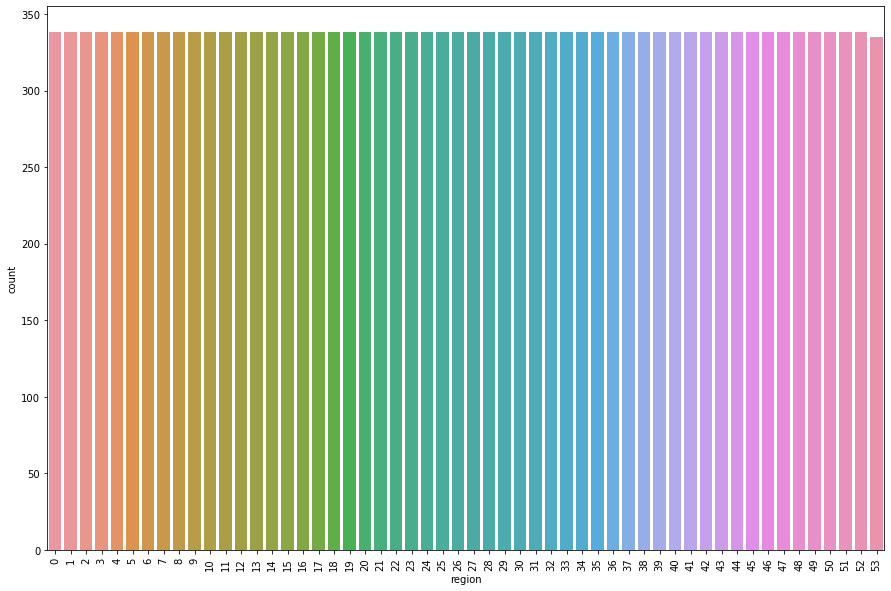

In [153]:
plt.figure(figsize=(15,10))
sns.countplot(df['region'])
plt.xticks(rotation=90)
plt.show()

In [165]:
df['region'].shape

(18249,)

Since our target variable is region , I made a condition i.e the value 
27 or higher getting classified will be termed as 'good/1' and the remainder as 'not good/0'.

0 - refers to North America
1 - refers to South America

In [164]:
df['region'] = df['region'].replace(0,0)
df['region'] = df['region'].replace(1,0)
df['region'] = df['region'].replace(2,0)
df['region'] = df['region'].replace(3,0)
df['region'] = df['region'].replace(4,0)
df['region'] = df['region'].replace(5,0)

In [166]:
df['region'] = df['region'].replace(6,0)
df['region'] = df['region'].replace(7,0)
df['region'] = df['region'].replace(8,0)
df['region'] = df['region'].replace(9,0)
df['region'] = df['region'].replace(10,0)

df['region'] = df['region'].replace(11,0)
df['region'] = df['region'].replace(12,0)
df['region'] = df['region'].replace(13,0)
df['region'] = df['region'].replace(14,0)
df['region'] = df['region'].replace(15,0)
df['region'] = df['region'].replace(16,0)
df['region'] = df['region'].replace(17,0)
df['region'] = df['region'].replace(18,0)
df['region'] = df['region'].replace(19,0)
df['region'] = df['region'].replace(20,0)

df['region'] = df['region'].replace(21,0)
df['region'] = df['region'].replace(22,0)
df['region'] = df['region'].replace(23,0)
df['region'] = df['region'].replace(24,0)
df['region'] = df['region'].replace(25,0)
df['region'] = df['region'].replace(26,0)
df['region'] = df['region'].replace(27,0)
df['region'] = df['region'].replace(28,1)
df['region'] = df['region'].replace(29,1)
df['region'] = df['region'].replace(30,1)

In [167]:
df['region'] = df['region'].replace(31,1)
df['region'] = df['region'].replace(32,1)
df['region'] = df['region'].replace(33,1)
df['region'] = df['region'].replace(34,1)
df['region'] = df['region'].replace(35,1)
df['region'] = df['region'].replace(36,1)
df['region'] = df['region'].replace(37,1)
df['region'] = df['region'].replace(38,1)
df['region'] = df['region'].replace(39,1)
df['region'] = df['region'].replace(40,1)

df['region'] = df['region'].replace(41,1)
df['region'] = df['region'].replace(42,1)
df['region'] = df['region'].replace(43,1)
df['region'] = df['region'].replace(44,1)
df['region'] = df['region'].replace(45,1)
df['region'] = df['region'].replace(46,1)
df['region'] = df['region'].replace(47,1)
df['region'] = df['region'].replace(48,1)
df['region'] = df['region'].replace(49,1)
df['region'] = df['region'].replace(50,1)

df['region'] = df['region'].replace(51,1)
df['region'] = df['region'].replace(52,1)
df['region'] = df['region'].replace(53,1)
df['region'] = df['region'].replace(54,1)

In [168]:
df['region'].value_counts()

0    9464
1    8785
Name: region, dtype: int64

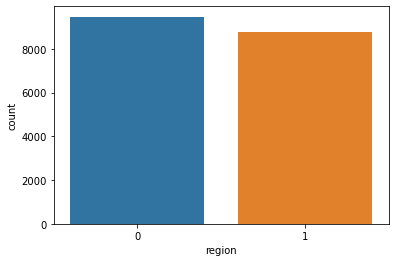

In [172]:
sns.countplot(df['region']);

Splitting the dataset into 2 variables namely 'X' and 'Y' for feature and label respectively.

In [169]:
X_classification = df.drop(['region'],axis=1)
Y_classification = df['region']

In [170]:
X_classification.head()

,AveragePrice,4046,4770,Large Bags,XLarge Bags,type,year
0,1.33,1036.74,48.16,93.25,0.0,0,0
1,1.35,674.28,58.33,97.49,0.0,0,0
2,0.93,794.70,130.50,103.14,0.0,0,0
3,1.08,1132.00,72.58,133.76,0.0,0,0
4,1.28,941.48,75.78,197.69,0.0,0,0


In [174]:
Y_classification.head()

0    0
1    0
2    0
3    0
4    0
Name: region, dtype: int32

# Converting an Imbalanced Dataset to Balanced Dataset

In [175]:
Y_classification.value_counts()

0    9464
1    8785
Name: region, dtype: int64

In [176]:
from imblearn.over_sampling import SMOTE

In [181]:
oversample = SMOTE(0.96)
X_classification, Y_classification = oversample.fit_resample(X_classification, Y_classification)

In [182]:
Y_classification.value_counts()

0    9464
1    9085
Name: region, dtype: int64

For Classification

In [183]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score,plot_confusion_matrix
from sklearn.model_selection import cross_val_score,KFold,ShuffleSplit

Feature Scaling of X_classification

In [184]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [185]:
X_scaled_classification = pd.DataFrame(scaler.fit_transform(X_classification),columns=X_classification.columns)

X_scaled_classification.head()

,AveragePrice,4046,4770,Large Bags,XLarge Bags,type,year
0,-0.145710,-0.580627,-0.564465,-0.617098,-0.470044,-0.998115,-1.21961
1,-0.088545,-0.582738,-0.563473,-0.616961,-0.470044,-0.998115,-1.21961
2,-1.289007,-0.582037,-0.556435,-0.616777,-0.470044,-0.998115,-1.21961
3,-0.860271,-0.580073,-0.562084,-0.615782,-0.470044,-0.998115,-1.21961
4,-0.288622,-0.581182,-0.561772,-0.613706,-0.470044,-0.998115,-1.21961


In [186]:
X_scaled_classification.skew()

AveragePrice   -0.012818
4046            1.816285
4770            1.715997
Large Bags      1.642812
XLarge Bags     1.984625
type            0.003774
year            0.218656
dtype: float64

Use Power Transformer to transform the skewness part.

In [187]:
from sklearn.preprocessing import PowerTransformer

In [189]:
p_transform = PowerTransformer(method = 'yeo-johnson')
X_scaled_classification = pd.DataFrame(p_transform.fit_transform(X_scaled_classification), columns=X_scaled_classification.columns)
X_scaled_classification.head(5)

,AveragePrice,4046,4770,Large Bags,XLarge Bags,type,year
0,-0.143441,-0.930048,-0.812194,-1.015762,-0.641294,-0.998115,-1.273481
1,-0.086236,-0.951054,-0.799940,-1.014484,-0.641294,-0.998115,-1.273481
2,-1.290564,-0.944054,-0.714912,-1.012783,-0.641294,-0.998115,-1.273481
3,-0.859822,-0.924559,-0.782884,-1.003586,-0.641294,-0.998115,-1.273481
4,-0.286531,-0.935550,-0.779072,-0.984496,-0.641294,-0.998115,-1.273481


In [190]:
X_scaled_classification.skew()

AveragePrice   -0.019350
4046            0.398467
4770            0.553218
Large Bags      0.354813
XLarge Bags     1.027464
type            0.003774
year            0.027632
dtype: float64

Model Building for Classification Part

In [191]:
X_scaled_classification.shape

(18549, 7)

In [192]:
Y_classification.shape

(18549,)

# 1] Logistic Regression

In [195]:
maxAccuracy=0
maxRandomState=0

for i in range(1, 100):
    x_train, x_test, y_train, y_test = train_test_split(X_scaled_classification, Y_classification, test_size=0.30, random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train, y_train)
    y_lr_c = lr.predict(x_test)
    accuracy_lr_classification = accuracy_score(y_test, y_lr_c)
    
    if accuracy_lr_classification>maxAccuracy:
        maxAccuracy=accuracy_lr_classification
        maxRandomState=i

print("Best accuracy score is", maxAccuracy ," on Random State", maxRandomState)

Best accuracy score is 0.5965858041329739  on Random State 85


In [196]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled_classification, Y_classification, test_size=0.30, random_state=85)

#training our model
lr=LogisticRegression()
lr.fit(x_train, y_train)

#Predicting y_test
y_lr_c = lr.predict(x_test)
accuracy_lr_classification = accuracy_score(y_test, y_lr_c)

#Accuracy Score
print("Accuracy score : ", accuracy_lr_classification)

print("---------------------------------------------")

#Cross Validation Score
cross_val_lr_classification = cross_val_score(lr,X_scaled_classification,Y_classification,cv=5)
print(cross_val_lr_classification)
print("Cross Validation Score : ",cross_val_lr_classification.mean())

print("---------------------------------------------")

#Confusion Matrix
print(confusion_matrix(y_test,y_lr_c))

print("---------------------------------------------")

#Classification Report
print(classification_report(y_test,y_lr_c))

Accuracy score :  0.5965858041329739
---------------------------------------------
[0.58059299 0.55229111 0.57924528 0.60269542 0.53194931]
Cross Validation Score :  0.5693548220653629
---------------------------------------------
[[1668 1150]
 [1095 1652]]
---------------------------------------------
              precision    recall  f1-score   support

           0       0.60      0.59      0.60      2818
           1       0.59      0.60      0.60      2747

    accuracy                           0.60      5565
   macro avg       0.60      0.60      0.60      5565
weighted avg       0.60      0.60      0.60      5565



In [197]:
#K-fold cross validation
K_fold = KFold(5,random_state=85,shuffle=True)
print(K_fold)
l1_c = cross_val_score(lr,X_scaled_classification,Y_classification,cv=K_fold)
print(l1_c)
print("--------------------------------------------------")
print("K-Fold Cross Validation Score : " , l1_c.mean())

KFold(n_splits=5, random_state=85, shuffle=True)
[0.58894879 0.58005391 0.57789757 0.5916442  0.5653815 ]
--------------------------------------------------
K-Fold Cross Validation Score :  0.5807851957684339


In [198]:
#Shuffle Split
shuffle = ShuffleSplit(n_splits=5,test_size=0.30,random_state=85)
print(shuffle)
l2_c = cross_val_score(lr,X_scaled_classification,Y_classification,cv=shuffle)
print(l2_c)
print("--------------------------------------------------")
print("Shuffle Split : ",l2_c.mean())

ShuffleSplit(n_splits=5, random_state=85, test_size=0.3, train_size=None)
[0.5965858  0.5836478  0.57969452 0.58724169 0.57592093]
--------------------------------------------------
Shuffle Split :  0.584618149146451


# 2]Decision Tree

In [199]:
maxAccuracy=0
maxRandomState=0

for i in range(1, 100):
    x_train, x_test, y_train, y_test = train_test_split(X_scaled_classification, Y_classification, test_size=0.30, random_state=i)
    dt=DecisionTreeClassifier()
    dt.fit(x_train, y_train)
    y_dt_c = dt.predict(x_test)
    accuracy_dt = accuracy_score(y_test, y_dt_c)
    
    if accuracy_dt>maxAccuracy:
        maxAccuracy=accuracy_dt
        maxRandomState=i

print("Best accuracy score is", maxAccuracy ," on Random State", maxRandomState)

Best accuracy score is 0.810062893081761  on Random State 48


In [200]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled_classification, Y_classification, test_size=0.30, random_state=48)

#training our model
dt=DecisionTreeClassifier()
dt.fit(x_train, y_train)

#Predicting y_test
y_dt_c = dt.predict(x_test)
accuracy_dt = accuracy_score(y_test, y_dt_c)

#Accuracy Score
print("Accuracy score : ", accuracy_dt)

print("---------------------------------------------")

#Cross Validation Score
cross_val_dt_c = cross_val_score(dt,X_scaled_classification,Y_classification,cv=5)
print(cross_val_dt_c)
print("Cross Validation Score : ",cross_val_dt_c.mean())

print("---------------------------------------------")

#Confusion Matrix
print(confusion_matrix(y_test,y_dt_c))

print("---------------------------------------------")

#Classification Report
print(classification_report(y_test,y_dt_c))

Accuracy score :  0.8131176999101527
---------------------------------------------
[0.68733154 0.65175202 0.57196765 0.59892183 0.49797789]
Cross Validation Score :  0.6015901874874185
---------------------------------------------
[[2269  511]
 [ 529 2256]]
---------------------------------------------
              precision    recall  f1-score   support

           0       0.81      0.82      0.81      2780
           1       0.82      0.81      0.81      2785

    accuracy                           0.81      5565
   macro avg       0.81      0.81      0.81      5565
weighted avg       0.81      0.81      0.81      5565



In [201]:
#K-fold cross validation
K_fold = KFold(5,random_state=48,shuffle=True)
print(K_fold)
d1_c = cross_val_score(dt,X_scaled_classification,Y_classification,cv=K_fold)
print(d1_c)
print("--------------------------------------------------")
print("K-Fold Cross Validation Score : " , d1_c.mean())

KFold(n_splits=5, random_state=48, shuffle=True)
[0.81347709 0.80080863 0.79407008 0.79838275 0.80021569]
--------------------------------------------------
K-Fold Cross Validation Score :  0.8013908472070922


In [202]:
#Shuffle Split
shuffle = ShuffleSplit(n_splits=5,test_size=0.30,random_state=48)
print(shuffle)
d2_c = cross_val_score(dt,X_scaled_classification,Y_classification,cv=shuffle)
print(d2_c)
print("--------------------------------------------------")
print("Shuffle Split : ",d2_c.mean())

ShuffleSplit(n_splits=5, random_state=48, test_size=0.3, train_size=None)
[0.8097035  0.79281222 0.78939802 0.78957772 0.79424978]
--------------------------------------------------
Shuffle Split :  0.7951482479784366


# 3]KNN

In [203]:
maxAccuracy=0
maxRandomState=0

for i in range(1, 100):
    x_train, x_test, y_train, y_test = train_test_split(X_scaled_classification, Y_classification, test_size=0.30, random_state=i)
    knn=KNeighborsClassifier()
    knn.fit(x_train, y_train)
    y_knn_c = knn.predict(x_test)
    accuracy_knn = accuracy_score(y_test, y_knn_c)
    
    if accuracy_knn>maxAccuracy:
        maxAccuracy=accuracy_knn
        maxRandomState=i

print("Best accuracy score is", maxAccuracy ," on Random State", maxRandomState)

Best accuracy score is 0.7971248876909254  on Random State 40


In [204]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled_classification, Y_classification, test_size=0.30, random_state=40)

#training our model
knn=KNeighborsClassifier()
knn.fit(x_train, y_train)

#Predicting y_test
y_knn_c = knn.predict(x_test)
accuracy_knn = accuracy_score(y_test, y_knn_c)

#Accuracy Score
print("Accuracy score : ", accuracy_knn)

print("---------------------------------------------")

#Cross Validation Score
cross_val_knn_classification = cross_val_score(knn,X_scaled_classification,Y_classification,cv=5)
print(cross_val_knn_classification)
print("Cross Validation Score : ",cross_val_knn_classification.mean())

print("---------------------------------------------")

#Confusion Matrix
print(confusion_matrix(y_test,y_knn_c))

print("---------------------------------------------")

#Classification Report
print(classification_report(y_test,y_knn_c))

Accuracy score :  0.7971248876909254
---------------------------------------------
[0.51536388 0.51078167 0.5277628  0.54312668 0.51550283]
Cross Validation Score :  0.5225075742766012
---------------------------------------------
[[2263  544]
 [ 585 2173]]
---------------------------------------------
              precision    recall  f1-score   support

           0       0.79      0.81      0.80      2807
           1       0.80      0.79      0.79      2758

    accuracy                           0.80      5565
   macro avg       0.80      0.80      0.80      5565
weighted avg       0.80      0.80      0.80      5565



In [205]:
#K-fold cross validation
K_fold = KFold(5,random_state=40,shuffle=True)
print(K_fold)
k1_c = cross_val_score(knn,X_scaled_classification,Y_classification,cv=K_fold)
print(k1_c)
print("--------------------------------------------------")
print("K-Fold Cross Validation Score : " , k1_c.mean())

KFold(n_splits=5, random_state=40, shuffle=True)
[0.80727763 0.78598383 0.78032345 0.77654987 0.78484767]
--------------------------------------------------
K-Fold Cross Validation Score :  0.7869964877448967


In [206]:
#Shuffle Split
shuffle = ShuffleSplit(n_splits=5,test_size=0.30,random_state=40)
print(shuffle)
k2_c = cross_val_score(knn,X_scaled_classification,Y_classification,cv=shuffle)
print(k2_c)
print("--------------------------------------------------")
print("Shuffle Split : ",k2_c.mean())

ShuffleSplit(n_splits=5, random_state=40, test_size=0.3, train_size=None)
[0.79712489 0.78418688 0.77681941 0.79371069 0.7902965 ]
--------------------------------------------------
Shuffle Split :  0.7884276729559749


# 4]Random Forest

In [207]:
maxAccuracy=0
maxRandomState=0

for i in range(1, 100):
    x_train, x_test, y_train, y_test = train_test_split(X_scaled_classification, Y_classification, test_size=0.30, random_state=i)
    rf=RandomForestClassifier()
    rf.fit(x_train, y_train)
    y_rf_c = rf.predict(x_test)
    accuracy_rf = accuracy_score(y_test, y_rf_c)
    
    if accuracy_rf>maxAccuracy:
        maxAccuracy=accuracy_rf
        maxRandomState=i

print("Best accuracy score is", maxAccuracy ," on Random State", maxRandomState)

Best accuracy score is 0.8709793351302785  on Random State 96


In [208]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled_classification, Y_classification, test_size=0.30, random_state=96)

#training our model
rf=RandomForestClassifier()
rf.fit(x_train, y_train)

#Predicting y_test
y_rf_c = rf.predict(x_test)
accuracy_rf = accuracy_score(y_test, y_rf_c)

#Accuracy Score
print("Accuracy score : ", accuracy_rf)

print("---------------------------------------------")

#Cross Validation Score
cross_val_rf_classification = cross_val_score(rf,X_scaled_classification,Y_classification,cv=5)
print(cross_val_rf_classification)
print("Cross Validation Score : ",cross_val_rf_classification.mean())

print("---------------------------------------------")

#Confusion Matrix
print(confusion_matrix(y_test,y_rf_c))

print("---------------------------------------------")

#Classification Report
print(classification_report(y_test,y_rf_c))

Accuracy score :  0.869182389937107
---------------------------------------------
[0.63557951 0.66442049 0.59703504 0.67169811 0.54489081]
Cross Validation Score :  0.6227247919572046
---------------------------------------------
[[2482  305]
 [ 423 2355]]
---------------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      2787
           1       0.89      0.85      0.87      2778

    accuracy                           0.87      5565
   macro avg       0.87      0.87      0.87      5565
weighted avg       0.87      0.87      0.87      5565



In [209]:
#K-fold cross validation
K_fold = KFold(5,random_state=96,shuffle=True)
print(K_fold)
r1_c = cross_val_score(rf,X_scaled_classification,Y_classification,cv=K_fold)
print(r1_c)
print("--------------------------------------------------")
print("K-Fold Cross Validation Score : " , r1_c.mean())

KFold(n_splits=5, random_state=96, shuffle=True)
[0.87843666 0.86172507 0.86684636 0.86226415 0.86815853]
--------------------------------------------------
K-Fold Cross Validation Score :  0.8674861540988301


In [211]:
#Shuffle Split
shuffle = ShuffleSplit(n_splits=5,test_size=0.30,random_state=96)
print(shuffle)
r2_c = cross_val_score(rf,X_scaled_classification,Y_classification,cv=shuffle)
print(r2_c)
print("--------------------------------------------------")
print("Shuffle Split : ",r2_c.mean())

ShuffleSplit(n_splits=5, random_state=96, test_size=0.3, train_size=None)
[0.87026056 0.86684636 0.85983827 0.86109614 0.86469003]
--------------------------------------------------
Shuffle Split :  0.8645462713387241


# ROC_AUC 

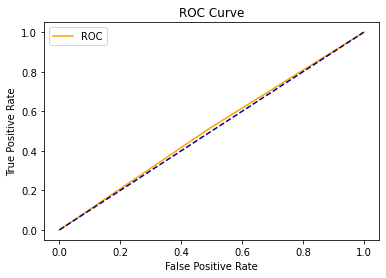

0.5101584338269085

In [212]:
fpr,tpr ,thresholds = roc_curve(y_test,y_lr_c)

plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

auc_score_c = roc_auc_score(y_test,y_lr_c)
auc_score_c

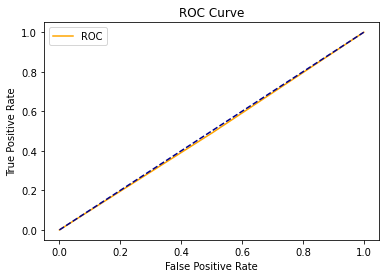

0.49451479834250506

In [213]:
fpr,tpr ,thresholds = roc_curve(y_test,y_dt_c)

plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

auc_score = roc_auc_score(y_test,y_dt_c)
auc_score

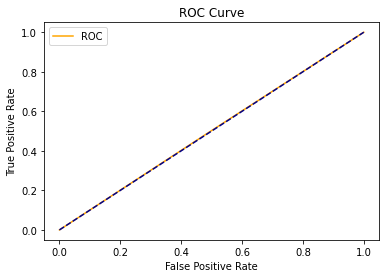

0.5013286773441332

In [214]:
fpr,tpr ,thresholds = roc_curve(y_test,y_knn_c)

plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

auc_score = roc_auc_score(y_test,y_knn_c)
auc_score

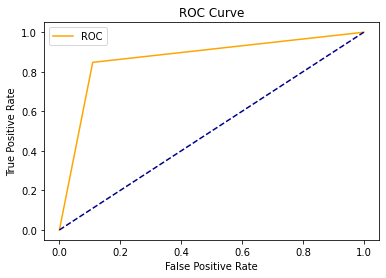

0.8691477555853658

In [215]:
fpr,tpr ,thresholds = roc_curve(y_test,y_rf_c)

plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

auc_score = roc_auc_score(y_test,y_rf_c)
auc_score

# Hyperparameter Tuning

In [216]:
from sklearn.model_selection import GridSearchCV

In [217]:
#Choosing Random Forest Classifier

param_grid = {
    'n_estimators' : [120,150,175,200],
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'max_depth' : [2,4,6,8],
    'min_samples_split': [1,2,3],
    'max_features' : ['sqrt','log2']
}

After comparing all the regression models I have selected Random Forest as my best model and have listed down it's parameters above referring the sklearn webpage

In [218]:
gradient_search_rf = GridSearchCV(RandomForestClassifier(),param_grid=param_grid,cv=5)

I am using the Grid Search CV method for hyper parameter tuning for my best model.

In [219]:
gradient_search_rf.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 4, 6, 8],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [1, 2, 3],
                         'n_estimators': [120, 150, 175, 200]})

In [230]:
gradient_search_rf.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'sqrt',
 'min_samples_split': 2,
 'n_estimators': 150}

In [231]:
gradient_search_rf.best_score_

0.7808845752447562

Based on best params , I have incorporated the params in my final model.

RandomForestClassifier(max_depth=8, random_state=96)
------------------------------------------------------------------------
[1 1 0 ... 1 0 1]
Accuracy Score : 0.7931716082659479
------------------------------------------------------------------------
Classification Report :                precision    recall  f1-score   support

           0       0.79      0.81      0.80      2787
           1       0.80      0.78      0.79      2778

    accuracy                           0.79      5565
   macro avg       0.79      0.79      0.79      5565
weighted avg       0.79      0.79      0.79      5565

-------------------------------------------------------------------------
Confusion Matrix 
------------------------------------------------------------------------


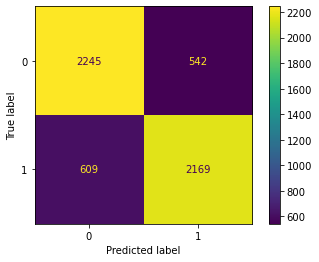

In [232]:
final_model = RandomForestClassifier(criterion='gini',max_depth=8, min_samples_split=2,max_features='sqrt', n_estimators=100,random_state=96)
print(final_model)
print("------------------------------------------------------------------------")
final_model.fit(x_train,y_train)
final_model_pred = final_model.predict(x_test)
print(final_model_pred)
print("Accuracy Score :",accuracy_score(y_test,final_model_pred))
print("------------------------------------------------------------------------")
print("Classification Report : ",classification_report(y_test,final_model_pred))
print("-------------------------------------------------------------------------")
print("Confusion Matrix ")
print(plot_confusion_matrix(final_model,x_test,y_test))
print("------------------------------------------------------------------------")

I have successfully incorporated the Hyper Parameter Tuning on my Final Model and received the accuracy score for it

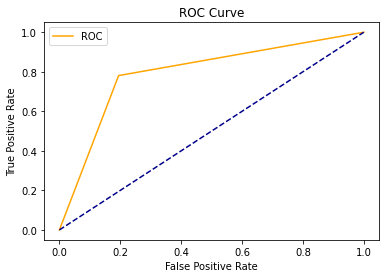

79.31515963114771

In [233]:
fpr,tpr ,thresholds = roc_curve(y_test,final_model_pred)

plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

auc_score = roc_auc_score(y_test,final_model_pred)
auc_score*100